In [392]:
import pandas
import math
import re
import matplotlib.pyplot as plt
import numpy
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [394]:
SKEMPI = pandas.read_csv("skempi_v2.csv", sep = ";")
PDBList = ("1JTG", "5E9D", "3SZK", "3BN9", "2J0T", "1KTZ", "3SGB", "3MZG", "1DAN", "1VFB", "1OGA")
PDBList2 = ("1JTG_A_B", "5E9D_AB_CDE", "3SZK_AB_C", "3BN9_B_CD", "2J0T_A_D",
           "1KTZ_A_B", "3SGB_E_I", "3MZG_A_B", "1DAN_HL_UT", "1VFB_AB_C", "1OGA_ABC_DE",
           "1AO7_ABC_DE")

#filtered_SKEMPI = SKEMPI[SKEMPI["#Pdb"].isin(PDBList2)]
filtered_SKEMPI = SKEMPI
filtered_df = filtered_SKEMPI[filtered_SKEMPI['Mutation(s)_cleaned'].str.len() <= 7]

In [396]:
def ddG(aff_wt, aff_mut):
    constant = (8.314/4184)*(273.15 + 25.0)
    return constant * (math.log(aff_mut) - math.log(aff_wt))

In [398]:
ddG_1DAN = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1DAN_af2.txt", sep = " ")
ddG_1JTG = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1JTG_af2.txt", sep = " ")
ddG_1KTZ = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1KTZ_af2.txt", sep = " ")
ddG_1OGA = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1OGA_af2.txt", sep = " ")
ddG_1VFB = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1VFB_af2.txt", sep = " ")
ddG_2J0T = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_2J0T_af2.txt", sep = " ")
ddG_3BN9 = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3BN9_af2.txt", sep = " ")
ddG_3MZG = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3MZG_af2.txt", sep = " ")
ddG_3SGB = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3SGB_af2.txt", sep = " ")
ddG_3SZK = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3SZK_af2.txt", sep = " ")
ddG_5E9D = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_5E9D_af2.txt", sep = " ")

ddG_1AO7 = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1AO7_af2.txt", sep = " ")
ddG_1CHO = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1CHO_af2.txt", sep = " ")
ddG_1IAR = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1IAR_af2.txt", sep = " ")
ddG_1KNE = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1KNE_af2.txt", sep = " ")
ddG_1MHP = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1MHP_af2.txt", sep = " ")
ddG_1PPF = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1PPF_af2.txt", sep = " ")
ddG_1R0R = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_1R0R_af2.txt", sep = " ")
ddG_2FTL = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_2FTL_af2.txt", sep = " ")
ddG_2JEL = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_2JEL_af2.txt", sep = " ")
ddG_3HFM = pandas.read_csv("AF2_ddGs/prism_rosetta_XXX_3HFM_af2.txt", sep = " ")

ddG_1DAN_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1DAN_af3.txt", sep = " ")
ddG_1JTG_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1JTG_af3.txt", sep = " ")
ddG_1KTZ_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1KTZ_af3.txt", sep = " ")
ddG_1OGA_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1OGA_af3.txt", sep = " ")
ddG_1VFB_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1VFB_af3.txt", sep = " ")
ddG_2J0T_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_2J0T_af3.txt", sep = " ")
ddG_3BN9_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3BN9_af3.txt", sep = " ")
ddG_3MZG_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3MZG_af3.txt", sep = " ")
ddG_3SGB_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3SGB_af3.txt", sep = " ")
ddG_3SZK_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3SZK_af3.txt", sep = " ")
ddG_5E9D_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_5E9D_af3.txt", sep = " ")

ddG_1AO7_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1AO7_af3.txt", sep = " ")
ddG_1CHO_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1CHO_af3.txt", sep = " ")
ddG_1IAR_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1IAR_af3.txt", sep = " ")
ddG_1KNE_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1KNE_af3.txt", sep = " ")
ddG_1MHP_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1MHP_af3.txt", sep = " ")
ddG_1PPF_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1PPF_af3.txt", sep = " ")
ddG_1R0R_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_1R0R_af3.txt", sep = " ")
ddG_2FTL_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_2FTL_af3.txt", sep = " ")
ddG_2JEL_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_2JEL_af3.txt", sep = " ")
ddG_3HFM_af3 = pandas.read_csv("AF3_ddGs/prism_rosetta_XXX_3HFM_af3.txt", sep = " ")

#ddG_1DAN_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1DAN.txt", sep = " ")
ddG_1JTG_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1JTG.txt", sep = " ")
ddG_1KTZ_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1KTZ.txt", sep = " ")
#ddG_1OGA_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1OGA.txt", sep = " ")
ddG_1VFB_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_1VFB.txt", sep = " ")
ddG_2J0T_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_2J0T.txt", sep = " ")
ddG_3BN9_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3BN9.txt", sep = " ")
ddG_3MZG_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3MZG.txt", sep = " ")
ddG_3SGB_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3SGB.txt", sep = " ")
ddG_3SZK_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_3SZK.txt", sep = " ")
ddG_5E9D_xtal = pandas.read_csv("xtal_ddGs/prism_rosetta_XXX_5E9D.txt", sep = " ")


In [400]:
#ddG_1DAN_xtal = ddG_1DAN_xtal[ddG_1DAN_xtal['variant'].str.len() <= 7]
ddG_1JTG_xtal = ddG_1JTG_xtal[ddG_1JTG_xtal['variant'].str.len() <= 7]
ddG_1KTZ_xtal = ddG_1KTZ_xtal[ddG_1KTZ_xtal['variant'].str.len() <= 7]
#ddG_1OGA_xtal = ddG_1OGA_xtal[ddG_1OGA_xtal['variant'].str.len() <= 7]
ddG_1VFB_xtal = ddG_1VFB_xtal[ddG_1VFB_xtal['variant'].str.len() <= 7]
ddG_2J0T_xtal = ddG_2J0T_xtal[ddG_2J0T_xtal['variant'].str.len() <= 7]
ddG_3BN9_xtal = ddG_3BN9_xtal[ddG_3BN9_xtal['variant'].str.len() <= 7]
ddG_3MZG_xtal = ddG_3MZG_xtal[ddG_3MZG_xtal['variant'].str.len() <= 7]
ddG_3SGB_xtal = ddG_3SGB_xtal[ddG_3SGB_xtal['variant'].str.len() <= 7]
ddG_3SZK_xtal = ddG_3SZK_xtal[ddG_3SZK_xtal['variant'].str.len() <= 7]
ddG_5E9D_xtal = ddG_5E9D_xtal[ddG_5E9D_xtal['variant'].str.len() <= 7]

In [402]:
SKEMPI_1DAN = filtered_df[filtered_df['#Pdb'].isin(["1DAN_HL_UT"])]
SKEMPI_1JTG = filtered_df[filtered_df['#Pdb'].isin(["1JTG_A_B"])]
SKEMPI_1KTZ = filtered_df[filtered_df['#Pdb'].isin(["1KTZ_A_B"])]
SKEMPI_1OGA = filtered_df[filtered_df['#Pdb'].isin(["1OGA_ABC_DE"])]
SKEMPI_1VFB = filtered_df[filtered_df['#Pdb'].isin(["1VFB_AB_C"])]
SKEMPI_2J0T = filtered_df[filtered_df['#Pdb'].isin(["2J0T_A_D"])]
SKEMPI_3BN9 = filtered_df[filtered_df['#Pdb'].isin(["3BN9_B_CD"])]
SKEMPI_3MZG = filtered_df[filtered_df['#Pdb'].isin(["3MZG_A_B"])]
SKEMPI_3SGB = filtered_df[filtered_df['#Pdb'].isin(["3SGB_E_I"])]
SKEMPI_3SZK = filtered_df[filtered_df['#Pdb'].isin(["3SZK_AB_C"])]
SKEMPI_5E9D = filtered_df[filtered_df['#Pdb'].isin(["5E9D_AB_CDE"])]
SKEMPI_1AO7 = filtered_df[filtered_df['#Pdb'].isin(["1AO7_ABC_DE"])]
SKEMPI_1CHO = filtered_df[filtered_df['#Pdb'].isin(["1CHO_EFG_I"])]
SKEMPI_1IAR = filtered_df[filtered_df['#Pdb'].isin(["1IAR_A_B"])]
SKEMPI_1KNE = filtered_df[filtered_df['#Pdb'].isin(["1KNE_A_P"])]
SKEMPI_1MHP = filtered_df[filtered_df['#Pdb'].isin(["1MHP_HL_A"])]
SKEMPI_1PPF = filtered_df[filtered_df['#Pdb'].isin(["1PPF_E_I"])]
SKEMPI_1R0R = filtered_df[filtered_df['#Pdb'].isin(["1R0R_E_I"])]
SKEMPI_2FTL = filtered_df[filtered_df['#Pdb'].isin(["2FTL_E_I"])]
SKEMPI_2JEL = filtered_df[filtered_df['#Pdb'].isin(["2JEL_LH_P"])]
SKEMPI_3HFM = filtered_df[filtered_df['#Pdb'].isin(["3HFM_HL_Y"])]

In [404]:
def extract_key(s):
    match = re.match(r"(.)(.)(\d+)(.)", s)
    if match:
        _, amino, pos, mut = match.groups()
        return (amino, int(pos), mut)  # Sort first by character Y, then by number
    return ("", 0)  # Fallback, if needed
custom_order = {'H': 0, 'L': 1, 'U': 2, 'T': 3}  # Lower number means higher priority

def extract_key_sp(s):
    match = re.match(r"(.)(.)(\d+)(.)", s)  # First char, sorting char, number, last char
    if match:
        _, y, num, _ = match.groups()
        return (custom_order.get(y, 99), int(num))  # Default rank 99 if char not found
    return (99, 0)  # Fallback case
strings = ["XA12C", "XB3D", "XA5E", "XB20C", "XA2C"]
sorted_strings = sorted(strings, key=extract_key)
#print(sorted_strings)
df_sorted = SKEMPI_1JTG.sort_values(by="Mutation(s)_cleaned", key=lambda col: col.map(extract_key))
#print(df_sorted)

In [610]:
def plotoutput(SKEMPI, ddG_out, title, qa, alg):
    SKEMPI_sorted = SKEMPI.sort_values(by="Mutation(s)_cleaned", key=lambda col: col.map(extract_key))#
    if (title == "1DAN"):
        SKEMPI_sorted = SKEMPI.sort_values(by="Mutation(s)_cleaned", key=lambda col: col.map(extract_key_sp))
    xvals = []
    yvals = []
    nans = []
    if (title == "1VFB"):
        xdupes = ["YB101A"]
    elif (title == "5E9D"):
        xdupes = ["TD90Q", "YD49W", "KD96Q"]
    elif (title == "1AO7"):
        xdupes = ["IE52R"]
    else:
        xdupes = []
    if (title == "1JTG" and alg == "xtal"):
        xdupes = ["EA85A", "EA79K"]
    ydupes = []
    length = len(SKEMPI)
    i = 0
    for index, row in SKEMPI_sorted.iterrows():
        cur = row["Mutation(s)_cleaned"]
       # print(row
        if (cur not in xdupes and (math.isnan(row["Affinity_wt_parsed"]) or math.isnan(row["Affinity_mut_parsed"]))):
            nans.append(i)
            if (qa):
                print(cur)
            i += 1
        elif (cur not in xdupes):
            xval = ddG(row["Affinity_wt_parsed"], row["Affinity_mut_parsed"])
            xvals.append(xval)
            xdupes.append(cur)
            i += 1
    #print(nans)
    k = 0
    for index, row in ddG_out.iterrows():
        if ("=" not in row["variant"] and k in nans):
            k += 1
            if (qa):
                print(row["variant"])
        elif ("=" not in row["variant"] and row["variant"] != "Y208A"):
            yvals.append(row["mean_ddG"])
            ydupes.append(row["variant"])
            k += 1
    if (qa):
        #print(xvals)
        #print(yvals)
        print(xdupes)
        print(ydupes)
        print(len(xvals))
        print(len(yvals))
    values = [xvals, yvals, title]
    return values
        
def plotdata(values, xlab, ylab, filename):
    xvals = values[0]
    yvals = values[1]
    title = values[2]
    fig, ax = plt.subplots()
    fig.set_size_inches(6.0, 6.0)
    plt.scatter(xvals, yvals, alpha = 0.5)
    ax.set_xlim([-4, 12])
    ax.set_ylim([-4, 12])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    if numpy.ptp(xvals) == 0:  # ptp() gives the range (max-min)
        raise ValueError("xvals must have a nonzero range for polyfit()")
    #m,b = numpy.polyfit(xvals, yvals, 1)
    #plt.axline((0, b), slope=m)
    #regr = linear_model.LinearRegression()
    #X = numpy.array(xvals).reshape(-1, 1)
    #regr.fit(X, yvals)
    #ypreds = regr.predict(X)
    j = 0
    plt.axline((0, 0), slope=1, linestyle='--', color = "black")
    while (j < len(xvals)):
        printout = str(xvals[j]) + ", "  + str(yvals[j])
       # print(printout)
        j += 1
    xpos = 3
    if (title == "5E9D"):
        xpos = 1
    plt.text(2.25, 11, "Pearson: %.3f" % numpy.corrcoef(xvals, yvals)[1][0])
    plt.savefig(filename, format = "pdf")
    plt.show()


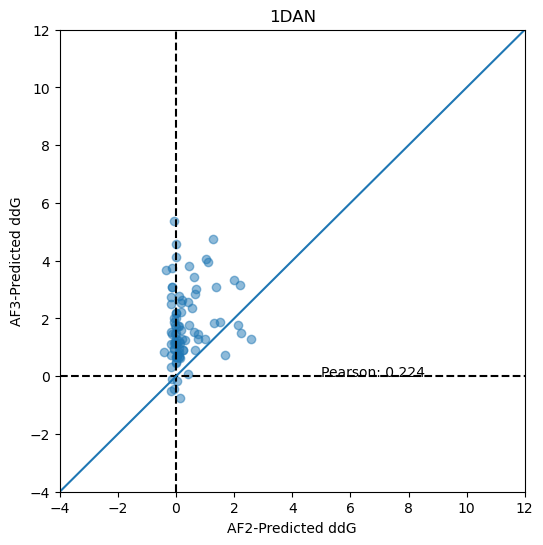

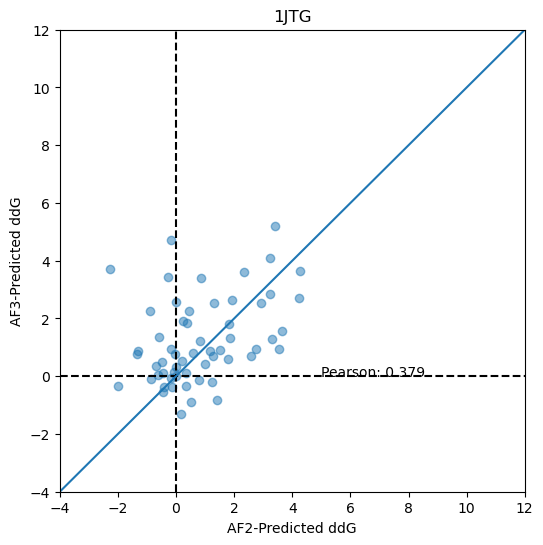

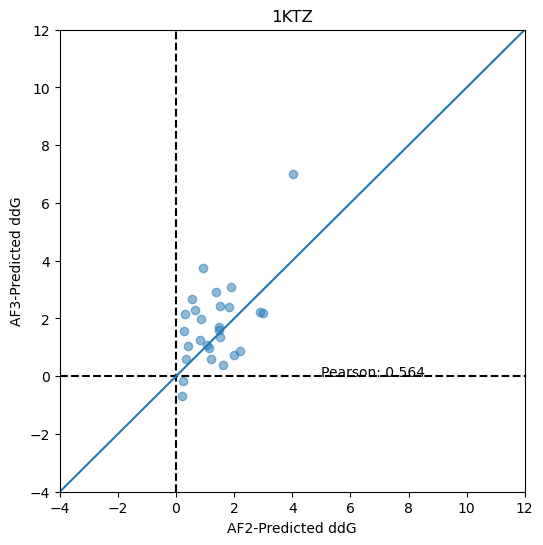

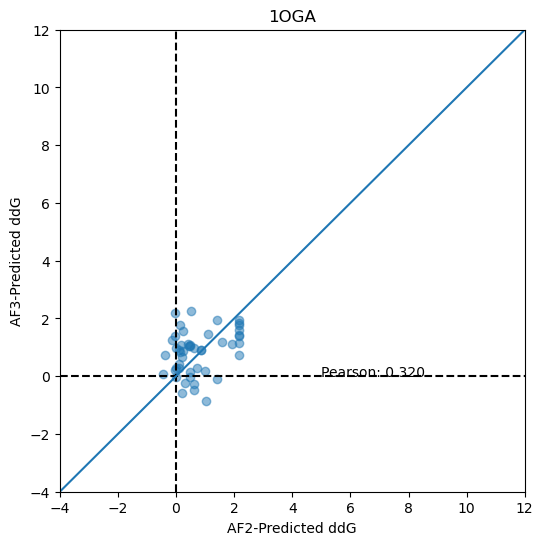

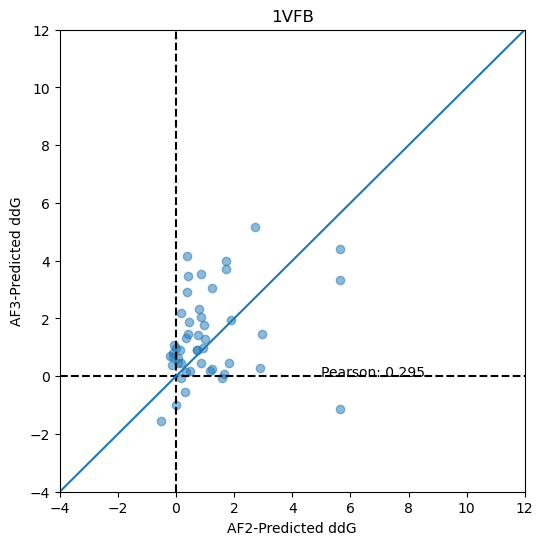

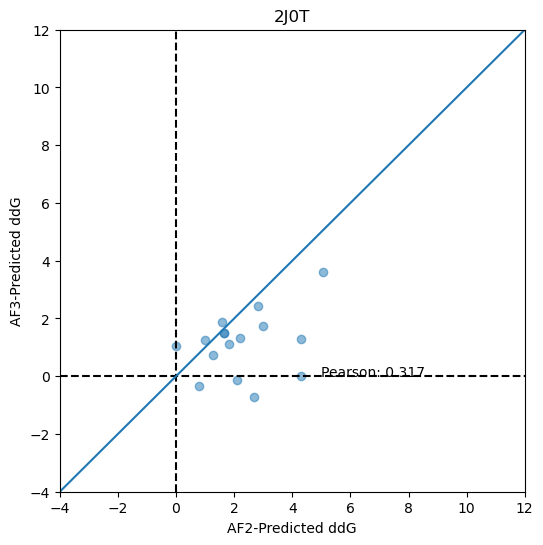

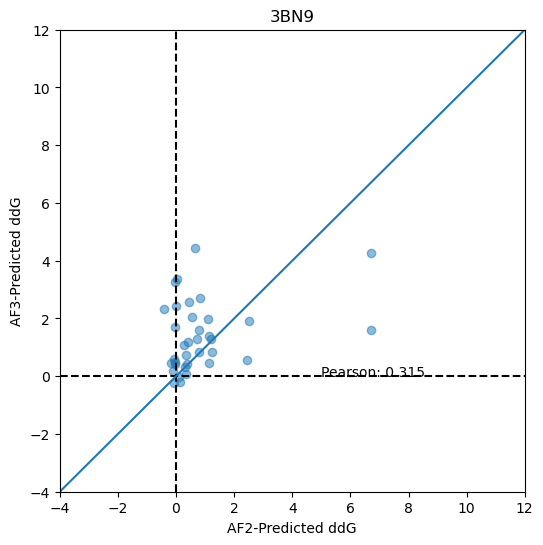

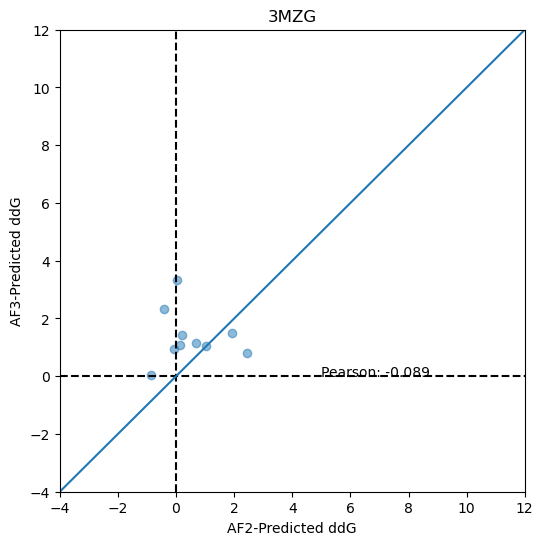

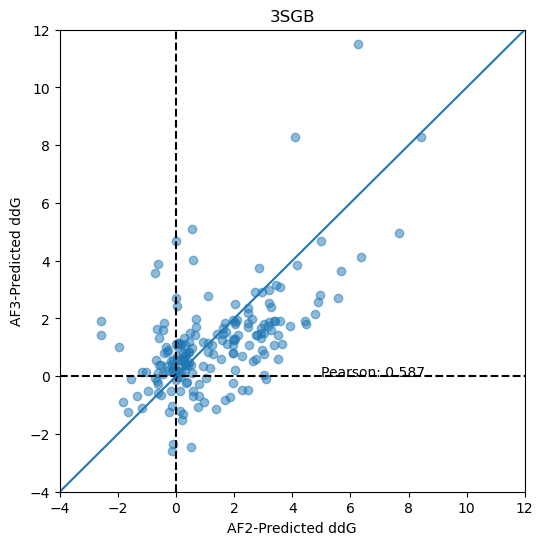

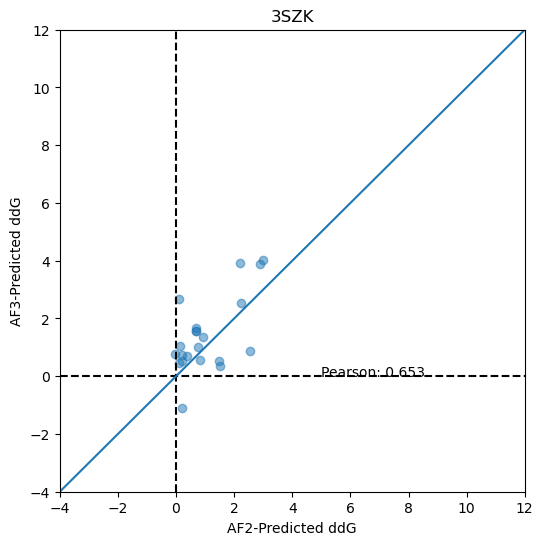

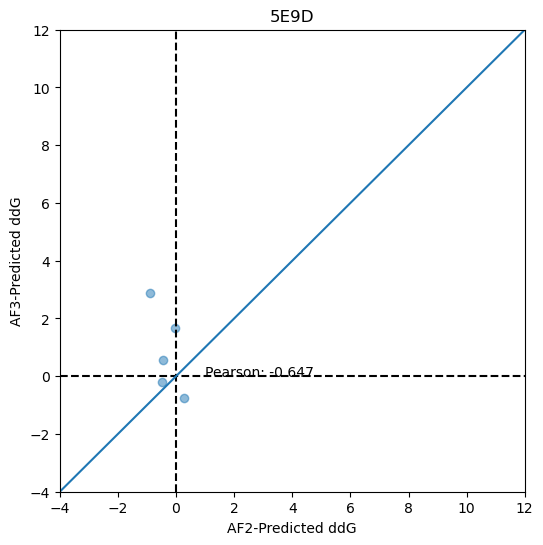

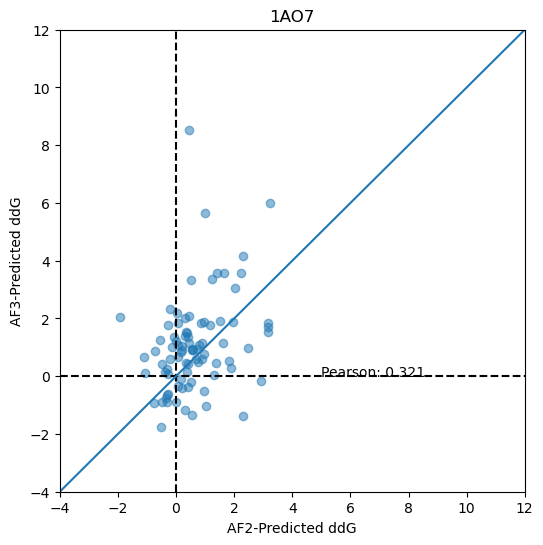

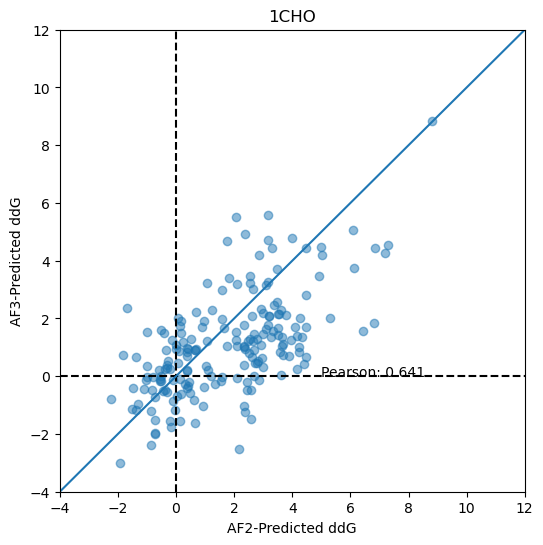

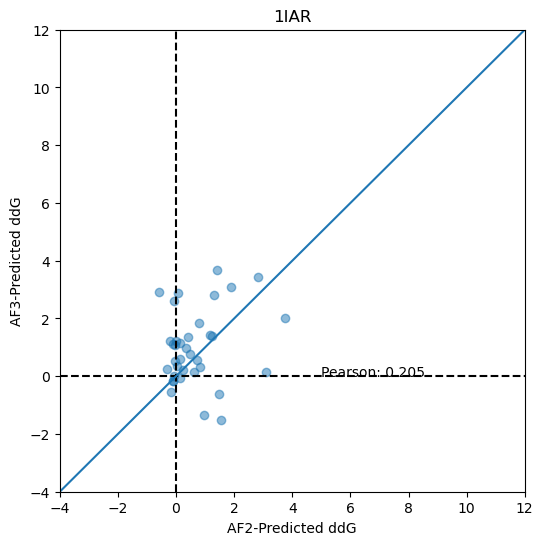

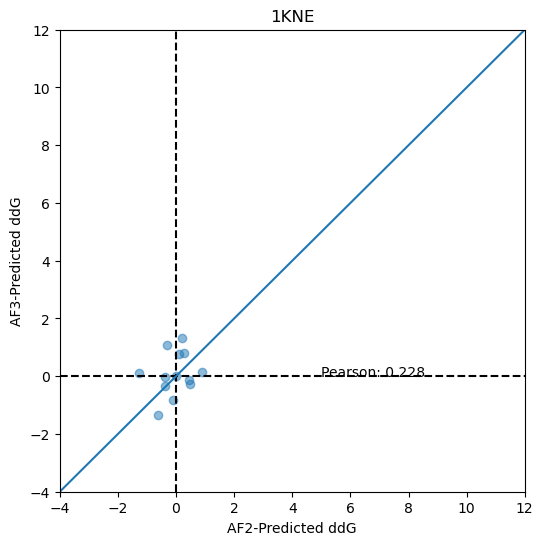

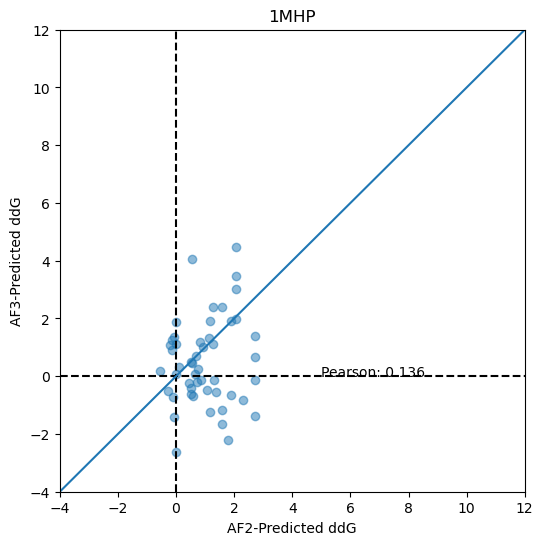

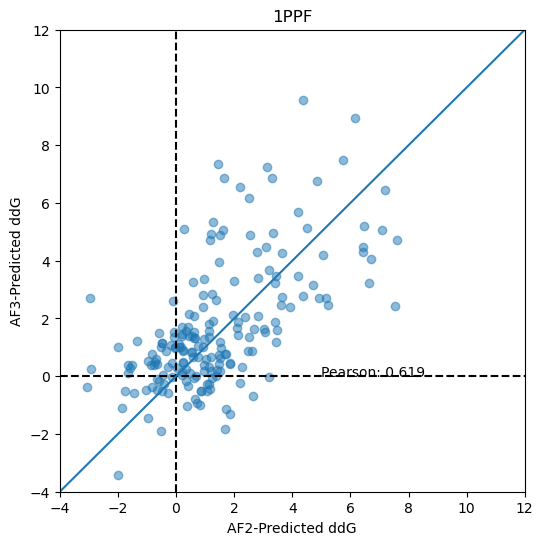

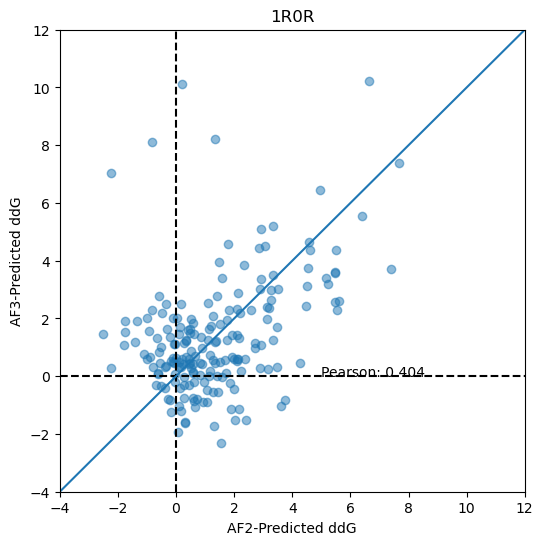

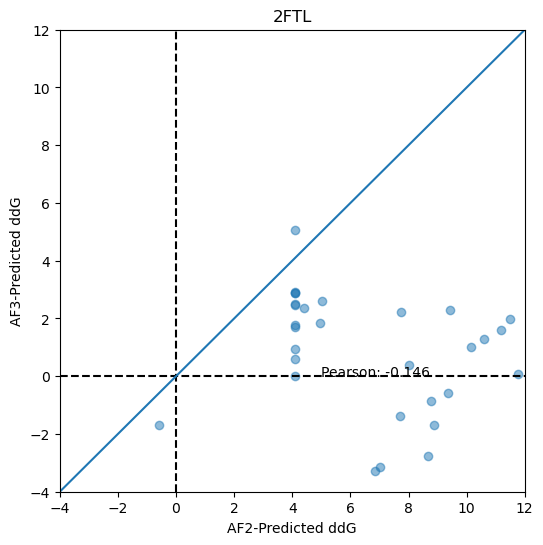

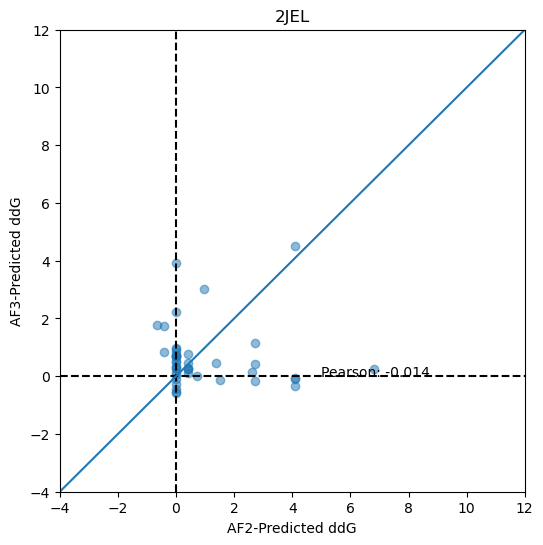

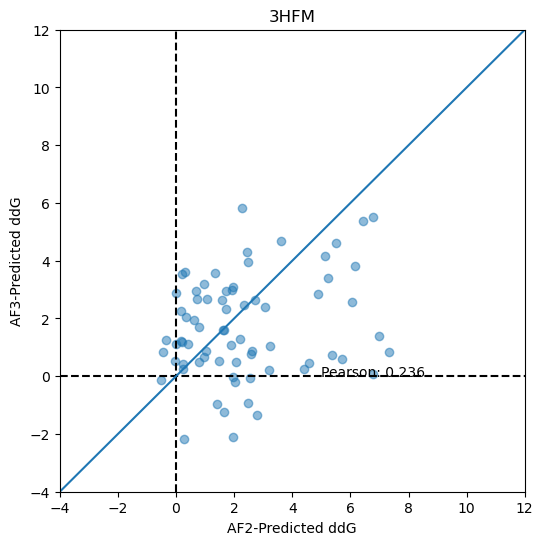

In [568]:
_1DAN = plotoutput(SKEMPI_1DAN, ddG_1DAN, "1DAN", False, 2)
_1JTG = plotoutput(SKEMPI_1JTG, ddG_1JTG, "1JTG", False, 2)
_1KTZ = plotoutput(SKEMPI_1KTZ, ddG_1KTZ, "1KTZ", False, 2)
_1OGA = plotoutput(SKEMPI_1OGA, ddG_1OGA, "1OGA", False, 2)
_1VFB = plotoutput(SKEMPI_1VFB, ddG_1VFB, "1VFB", False, 2)
_2J0T = plotoutput(SKEMPI_2J0T, ddG_2J0T, "2J0T", False, 2)
_3BN9 = plotoutput(SKEMPI_3BN9, ddG_3BN9, "3BN9", False, 2)
_3MZG = plotoutput(SKEMPI_3MZG, ddG_3MZG, "3MZG", False, 2)
_3SGB = plotoutput(SKEMPI_3SGB, ddG_3SGB, "3SGB", False, 2)
_3SZK = plotoutput(SKEMPI_3SZK, ddG_3SZK, "3SZK", False, 2)
_5E9D = plotoutput(SKEMPI_5E9D, ddG_5E9D, "5E9D", False, 2)
_1AO7 = plotoutput(SKEMPI_1AO7, ddG_1AO7, "1AO7", False, 2)
_1CHO = plotoutput(SKEMPI_1CHO, ddG_1CHO, "1CHO", False, 2)
_1IAR = plotoutput(SKEMPI_1IAR, ddG_1IAR, "1IAR", False, 2)
_1KNE = plotoutput(SKEMPI_1KNE, ddG_1KNE, "1KNE", False, 2)
_1MHP = plotoutput(SKEMPI_1MHP, ddG_1MHP, "1MHP", False, 2)
_1PPF = plotoutput(SKEMPI_1PPF, ddG_1PPF, "1PPF", False, 2)
_1R0R = plotoutput(SKEMPI_1R0R, ddG_1R0R, "1R0R", False, 2)
_2FTL = plotoutput(SKEMPI_2FTL, ddG_2FTL, "2FTL", False, 2)
_2JEL = plotoutput(SKEMPI_2JEL, ddG_2JEL, "2JEL", False, 2)
_3HFM = plotoutput(SKEMPI_3HFM, ddG_3HFM, "3HFM", False, 2)


_1DAN_3 = plotoutput(SKEMPI_1DAN, ddG_1DAN_af3, "1DAN", False, 3)
_1JTG_3 = plotoutput(SKEMPI_1JTG, ddG_1JTG_af3, "1JTG", False, 3)
_1KTZ_3 = plotoutput(SKEMPI_1KTZ, ddG_1KTZ_af3, "1KTZ", False, 3)
_1OGA_3 = plotoutput(SKEMPI_1OGA, ddG_1OGA_af3, "1OGA", False, 3)
_1VFB_3 = plotoutput(SKEMPI_1VFB, ddG_1VFB_af3, "1VFB", False, 3)
_2J0T_3 = plotoutput(SKEMPI_2J0T, ddG_2J0T_af3, "2J0T", False, 3)
_3BN9_3 = plotoutput(SKEMPI_3BN9, ddG_3BN9_af3, "3BN9", False, 3)
_3MZG_3 = plotoutput(SKEMPI_3MZG, ddG_3MZG_af3, "3MZG", False, 3)
_3SGB_3 = plotoutput(SKEMPI_3SGB, ddG_3SGB_af3, "3SGB", False, 3)
_3SZK_3 = plotoutput(SKEMPI_3SZK, ddG_3SZK_af3, "3SZK", False, 3)
_5E9D_3 = plotoutput(SKEMPI_5E9D, ddG_5E9D_af3, "5E9D", False, 3)
_1AO7_3 = plotoutput(SKEMPI_1AO7, ddG_1AO7_af3, "1AO7", False, 3)
_1CHO_3 = plotoutput(SKEMPI_1CHO, ddG_1CHO_af3, "1CHO", False, 3)
_1IAR_3 = plotoutput(SKEMPI_1IAR, ddG_1IAR_af3, "1IAR", False, 3)
_1KNE_3 = plotoutput(SKEMPI_1KNE, ddG_1KNE_af3, "1KNE", False, 3)
_1MHP_3 = plotoutput(SKEMPI_1MHP, ddG_1MHP_af3, "1MHP", False, 3)
_1PPF_3 = plotoutput(SKEMPI_1PPF, ddG_1PPF_af3, "1PPF", False, 3)
_1R0R_3 = plotoutput(SKEMPI_1R0R, ddG_1R0R_af3, "1R0R", False, 3)
_2FTL_3 = plotoutput(SKEMPI_2FTL, ddG_2FTL_af3, "2FTL", False, 3)
_2JEL_3 = plotoutput(SKEMPI_2JEL, ddG_2JEL_af3, "2JEL", False, 3)
_3HFM_3 = plotoutput(SKEMPI_3HFM, ddG_3HFM_af3, "3HFM", False, 3)


plotdata(_1DAN)
plotdata(_1JTG)
plotdata(_1KTZ)
plotdata(_1OGA)
plotdata(_1VFB)
plotdata(_2J0T)
plotdata(_3BN9)
plotdata(_3MZG)
plotdata(_3SGB)
plotdata(_3SZK)
plotdata(_5E9D)
plotdata(_1AO7)
plotdata(_1CHO)
plotdata(_1IAR)
plotdata(_1KNE)
plotdata(_1MHP)
plotdata(_1PPF)
plotdata(_1R0R)
plotdata(_2FTL)
plotdata(_2JEL)
plotdata(_3HFM)

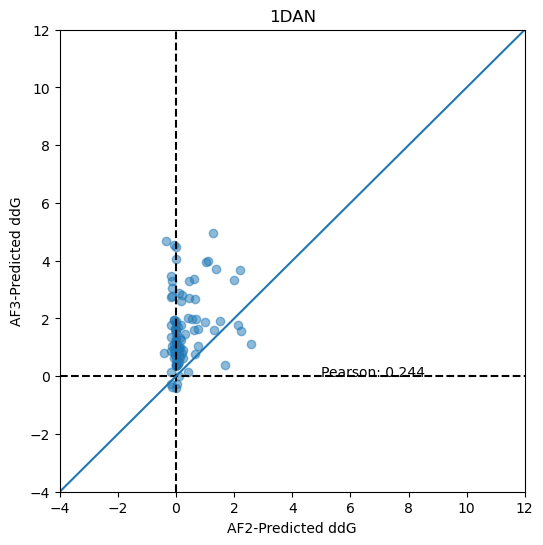

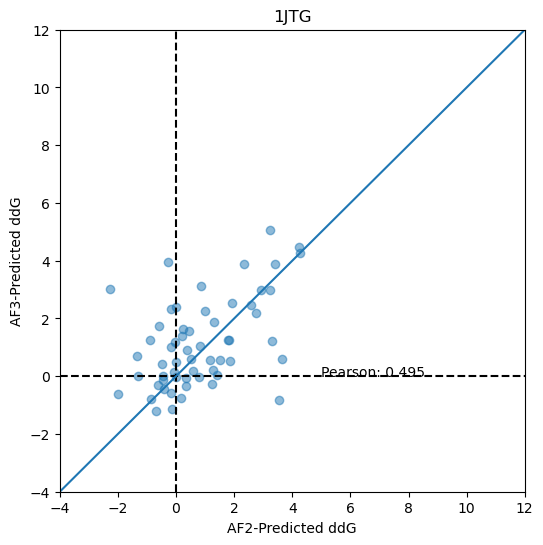

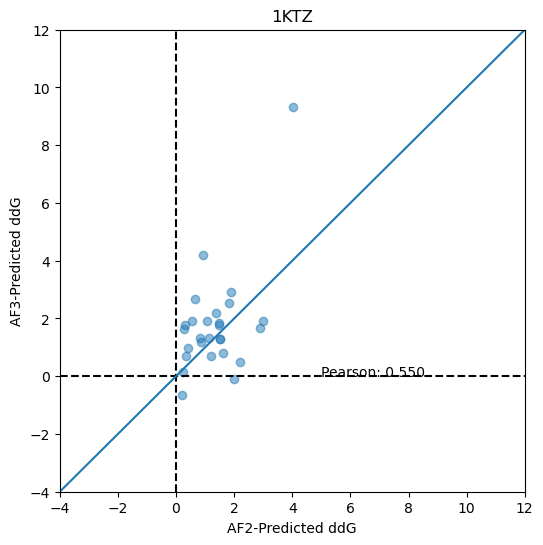

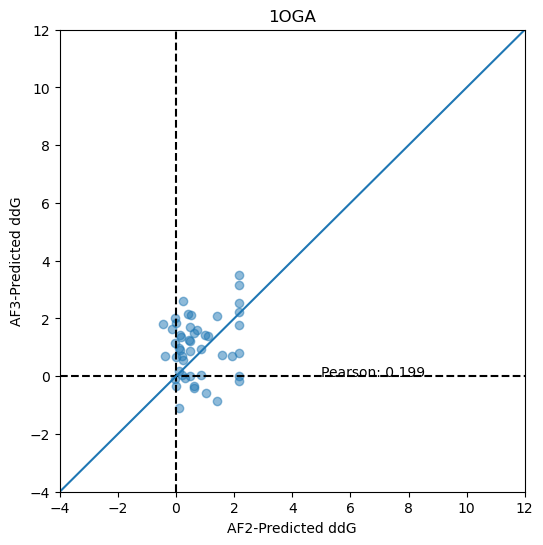

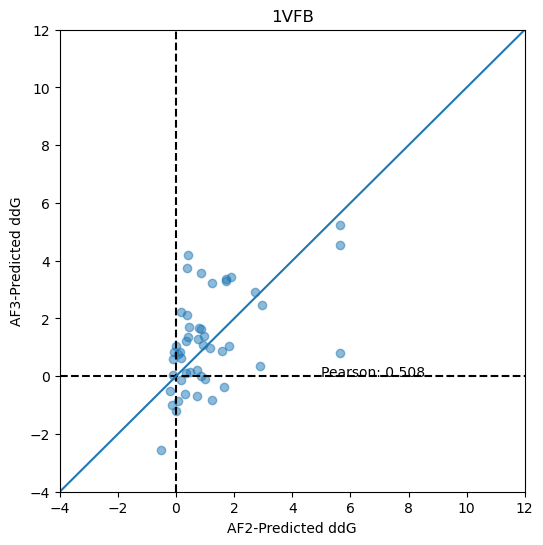

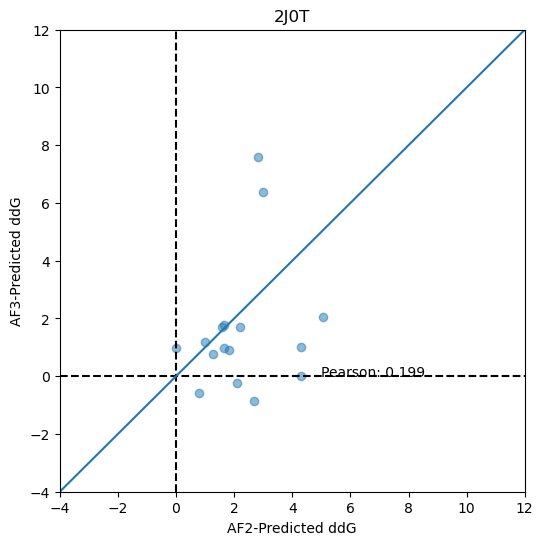

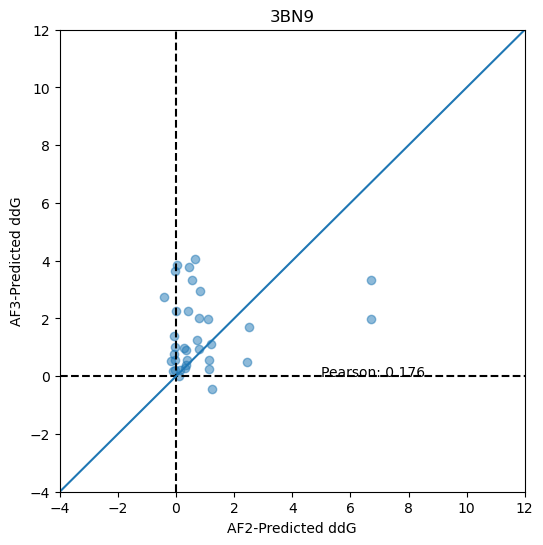

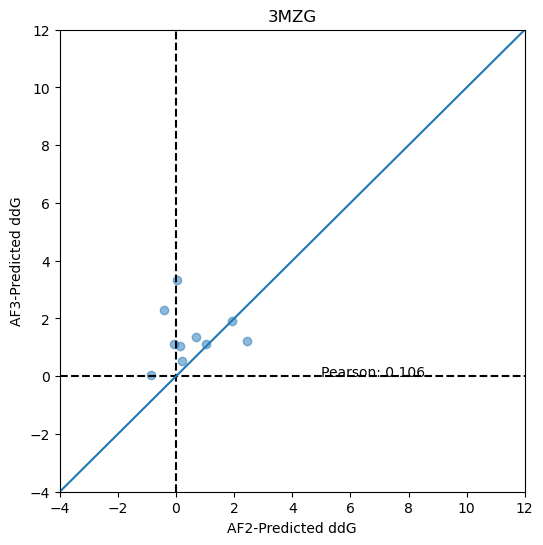

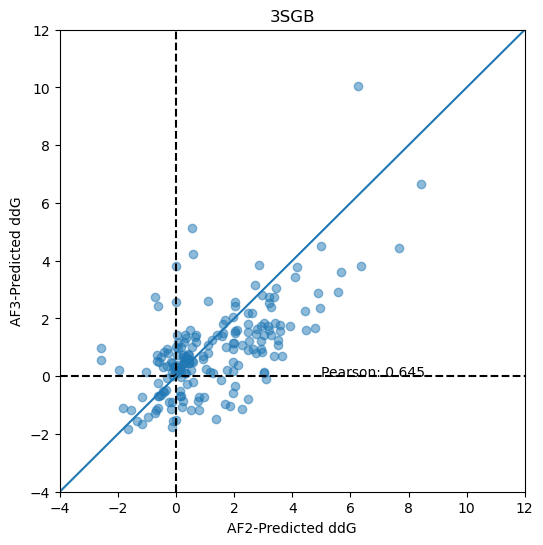

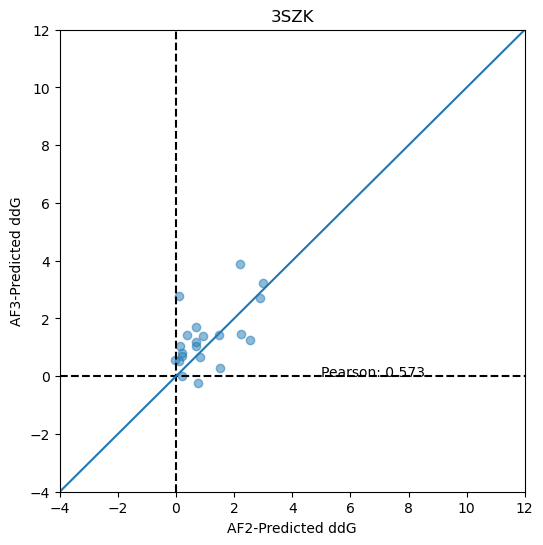

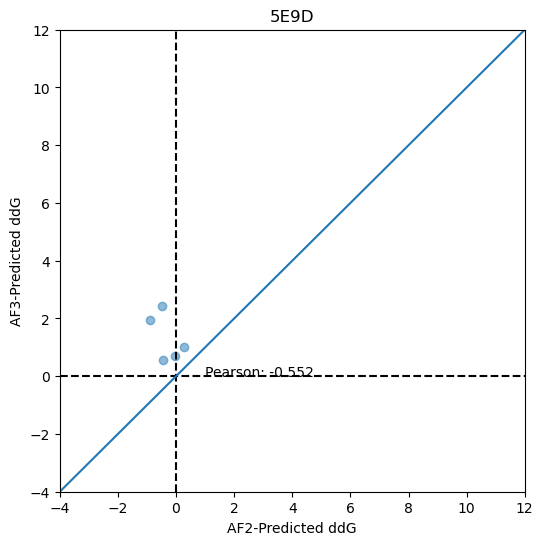

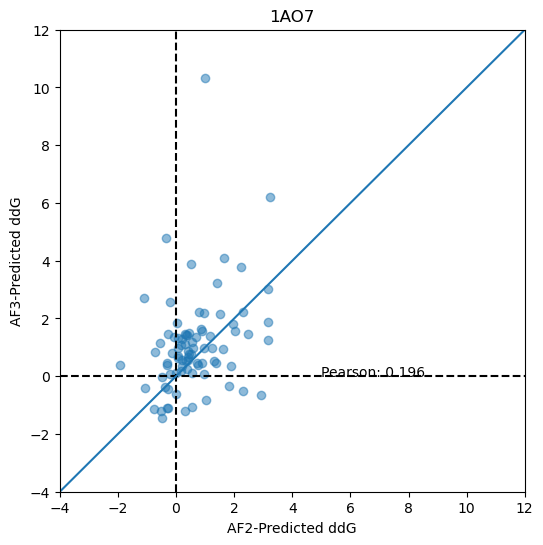

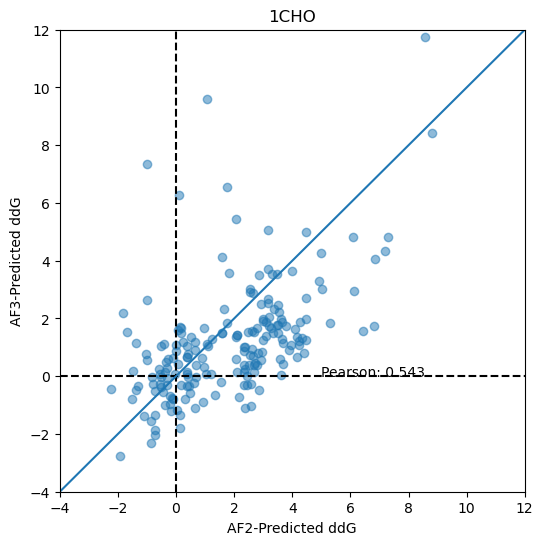

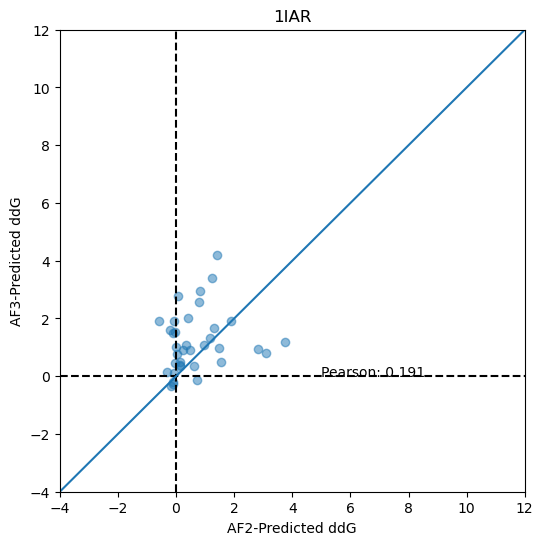

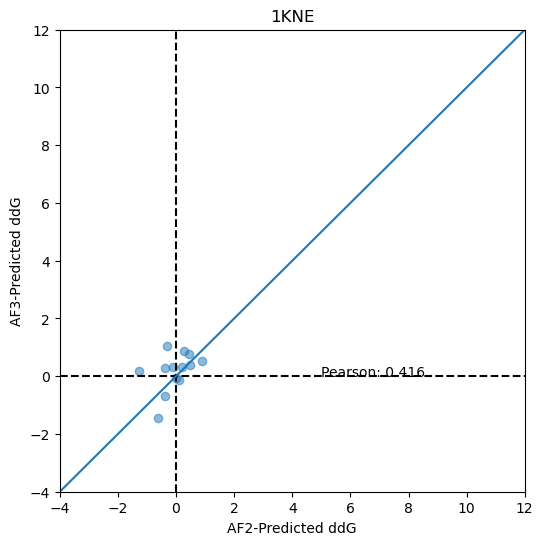

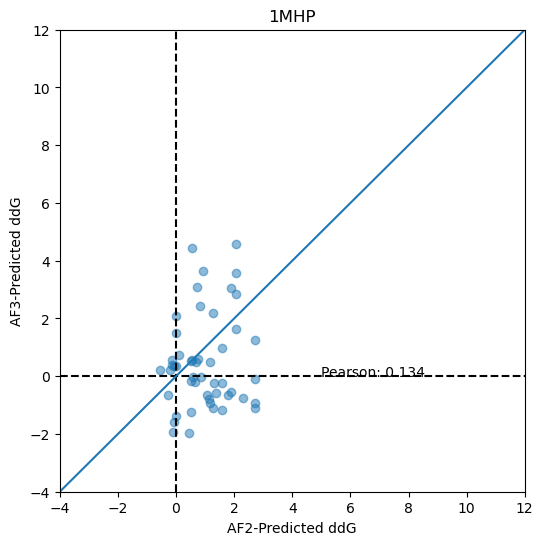

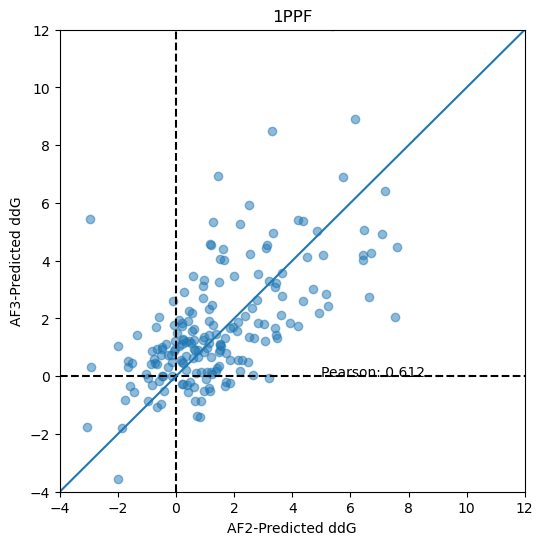

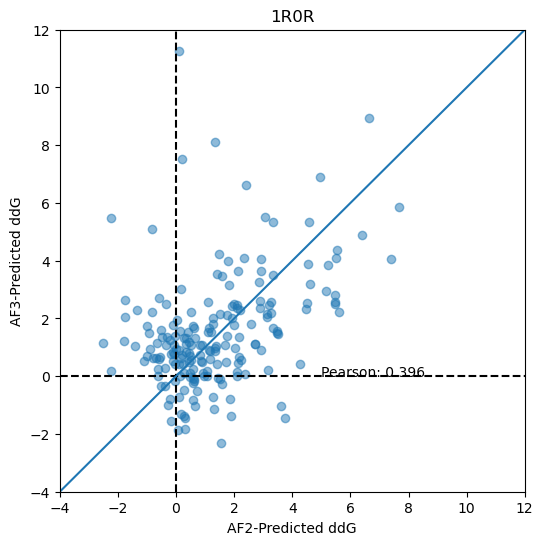

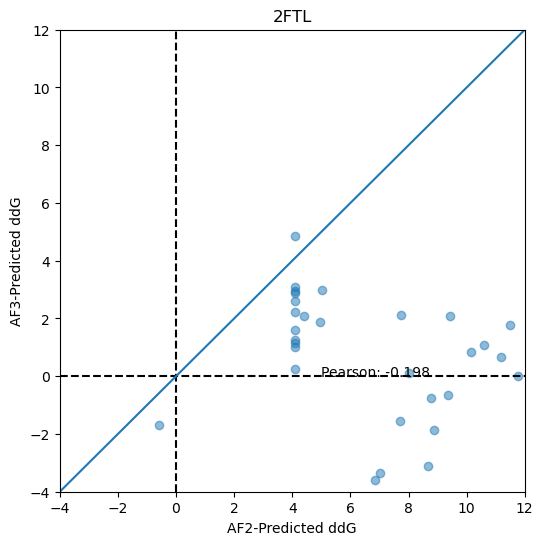

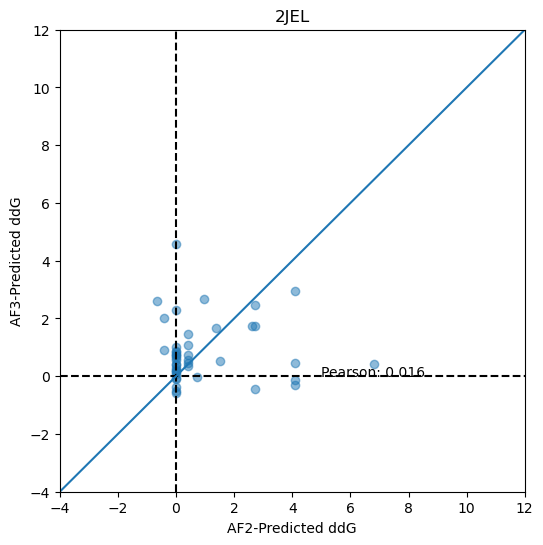

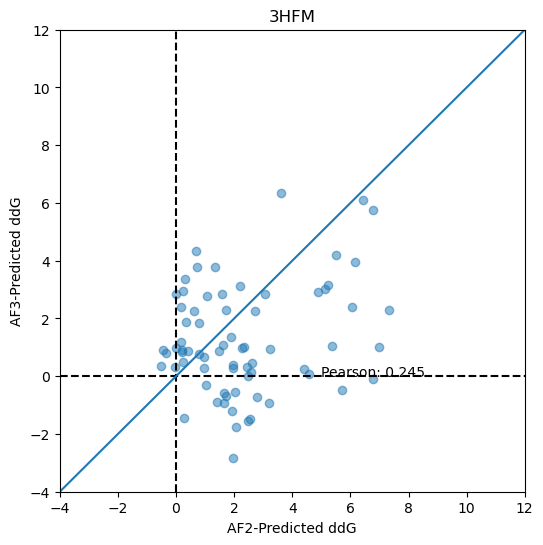

In [569]:
plotdata(_1DAN_3)
plotdata(_1JTG_3)
plotdata(_1KTZ_3)
plotdata(_1OGA_3)
plotdata(_1VFB_3)
plotdata(_2J0T_3)
plotdata(_3BN9_3)
plotdata(_3MZG_3)
plotdata(_3SGB_3)
plotdata(_3SZK_3)
plotdata(_5E9D_3)
plotdata(_1AO7_3)
plotdata(_1CHO_3)
plotdata(_1IAR_3)
plotdata(_1KNE_3)
plotdata(_1MHP_3)
plotdata(_1PPF_3)
plotdata(_1R0R_3)
plotdata(_2FTL_3)
plotdata(_2JEL_3)
plotdata(_3HFM_3)

['EA85A', 'EA79K', 'QA74A', 'NA75A', 'LA77A', 'VA78A', 'EA79A', 'EA79D', 'YA80A', 'PA82A', 'PA82Q', 'EA85G', 'EA85V', 'KA86A', 'KA86N', 'MA104A', 'SA105A', 'EA143A', 'EA143G', 'EA146K', 'VA190A', 'KA208A', 'SA209A', 'GA212S', 'EA213K', 'RA214Y', 'RA217A', 'MA244A', 'EB31A', 'TB32K', 'SB35A', 'FB36A', 'SB39A', 'HB41A', 'GB48A', 'DB49A', 'YB50A', 'YB51A', 'YB53A', 'SB71A', 'EB73A', 'EB73M', 'KB74A', 'NB89K', 'VB93K', 'WB112A', 'SB113A', 'TB140K', 'GB141A', 'FB142A', 'YB143A', 'RB144A', 'HB148A', 'WB150A', 'RB160A', 'WB162A', 'DB163A', 'DB163K']
['Q74A', 'N75A', 'L77A', 'V78A', 'E79A', 'E79D', 'Y80A', 'P82A', 'P82Q', 'E85G', 'E85V', 'K86A', 'K86N', 'M104A', 'S105A', 'E143A', 'E143G', 'E146K', 'V190A', 'K208A', 'S209A', 'G212S', 'E213K', 'R214Y', 'R217A', 'M244A', 'E293A', 'T294K', 'S297A', 'F298A', 'S301A', 'H303A', 'G310A', 'D311A', 'Y312A', 'Y313A', 'Y315A', 'S333A', 'E335A', 'E335M', 'K336A', 'N351K', 'V355K', 'W374A', 'S375A', 'T402K', 'G403A', 'F404A', 'Y405A', 'R406A', 'H410A', 'W41

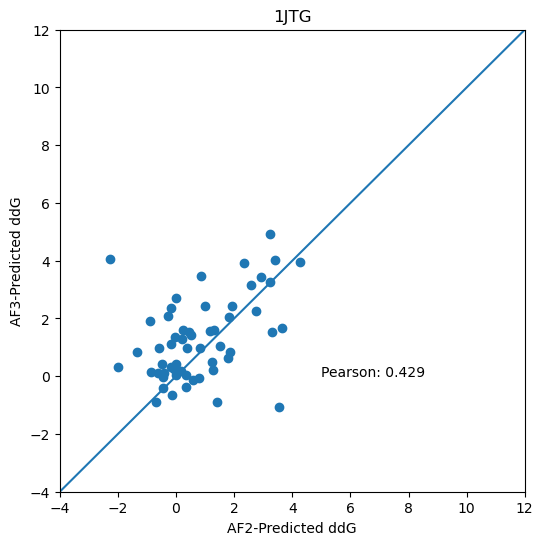

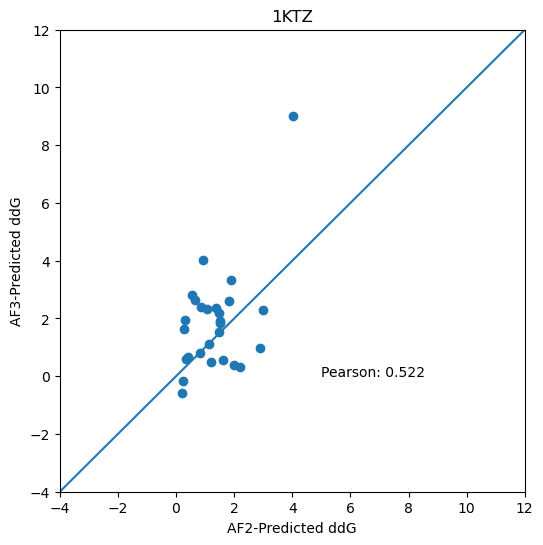

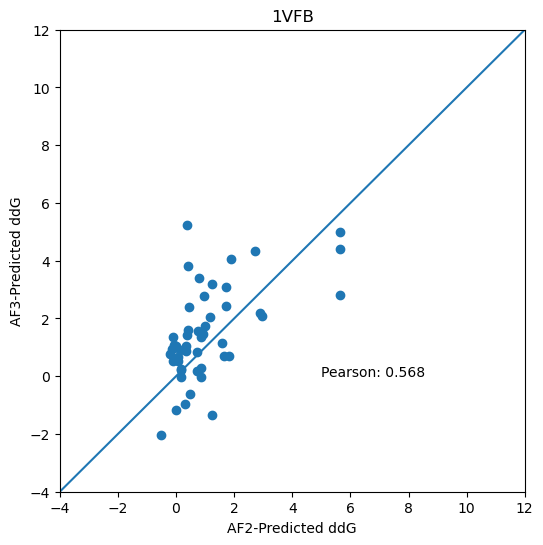

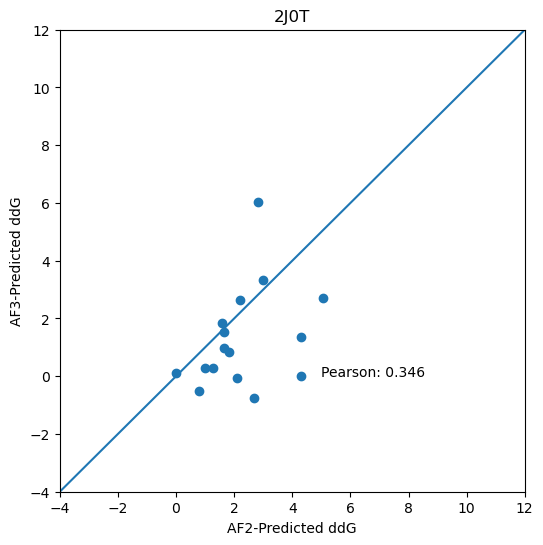

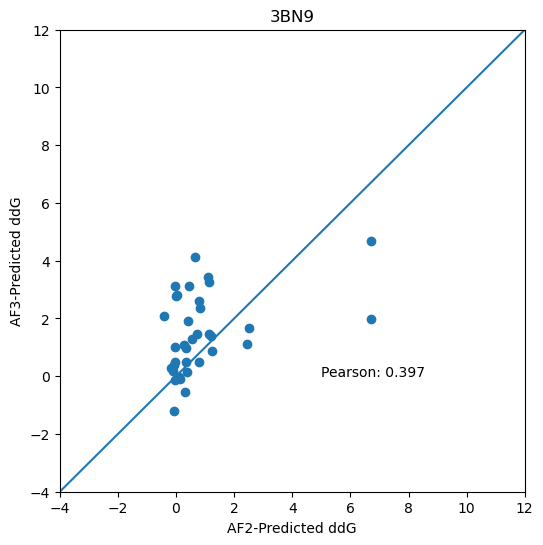

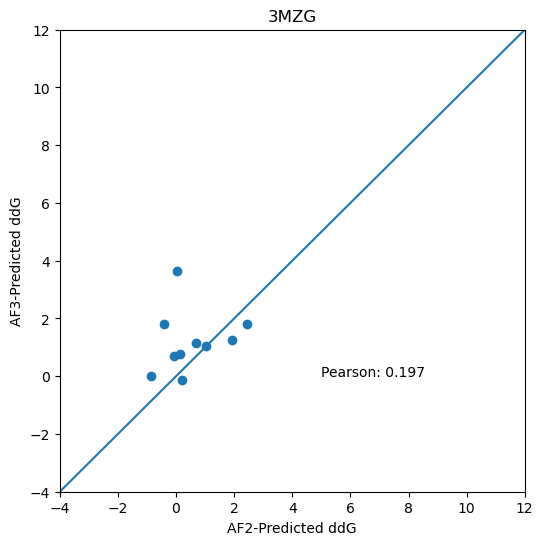

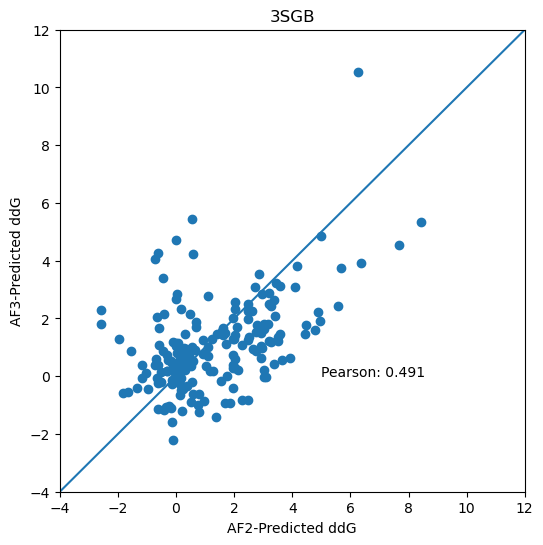

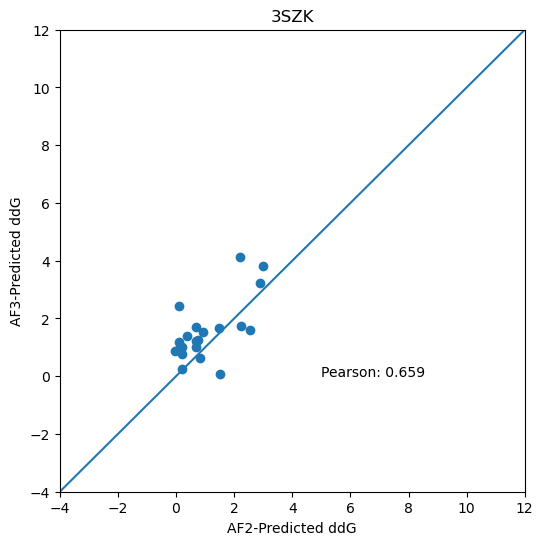

ValueError: x and y must be the same size

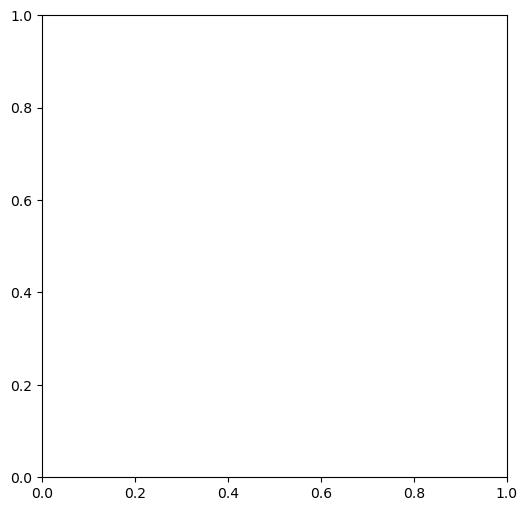

In [515]:
#_1DAN_x = plotoutput(SKEMPI_1DAN, ddG_1DAN_xtal, "1DAN", False, "xtal")
_1JTG_x = plotoutput(SKEMPI_1JTG, ddG_1JTG_xtal, "1JTG", False, "xtal")
_1KTZ_x = plotoutput(SKEMPI_1KTZ, ddG_1KTZ_xtal, "1KTZ", False, "xtal")
#_1OGA_x = plotoutput(SKEMPI_1OGA, ddG_1OGA_xtal, "1OGA", False, "xtal")
_1VFB_x = plotoutput(SKEMPI_1VFB, ddG_1VFB_xtal, "1VFB", False, "xtal")
_2J0T_x = plotoutput(SKEMPI_2J0T, ddG_2J0T_xtal, "2J0T", False, "xtal")
_3BN9_x = plotoutput(SKEMPI_3BN9, ddG_3BN9_xtal, "3BN9", False, "xtal")
_3MZG_x = plotoutput(SKEMPI_3MZG, ddG_3MZG_xtal, "3MZG", False, "xtal")
_3SGB_x = plotoutput(SKEMPI_3SGB, ddG_3SGB_xtal, "3SGB", False, "xtal")
_3SZK_x = plotoutput(SKEMPI_3SZK, ddG_3SZK_xtal, "3SZK", False, "xtal")
_5E9D_x = plotoutput(SKEMPI_5E9D, ddG_5E9D_xtal, "5E9D", False, "xtal")


#plotdata(plotoutput(SKEMPI_1DAN, ddG_1DAN_xtal, "1DAN", False))
plotdata(plotoutput(SKEMPI_1JTG, ddG_1JTG_xtal, "1JTG", False, "xtal"))
plotdata(plotoutput(SKEMPI_1KTZ, ddG_1KTZ_xtal, "1KTZ", False, "xtal"))
#plotdata(plotoutput(SKEMPI_1OGA, ddG_1OGA_xtal, "1OGA", False, "xtal"))
plotdata(plotoutput(SKEMPI_1VFB, ddG_1VFB_xtal, "1VFB", False, "xtal"))
plotdata(plotoutput(SKEMPI_2J0T, ddG_2J0T_xtal, "2J0T", False, "xtal"))
plotdata(plotoutput(SKEMPI_3BN9, ddG_3BN9_xtal, "3BN9", False, "xtal"))
plotdata(plotoutput(SKEMPI_3MZG, ddG_3MZG_xtal, "3MZG", False, "xtal"))
plotdata(plotoutput(SKEMPI_3SGB, ddG_3SGB_xtal, "3SGB", False, "xtal"))
plotdata(plotoutput(SKEMPI_3SZK, ddG_3SZK_xtal, "3SZK", False, "xtal"))
plotdata(plotoutput(SKEMPI_5E9D, ddG_5E9D_xtal, "5E9D", False, "xtal"))

In [ ]:
fullxdata = []
fullydata = []
partialx_af2 = []
partialy_af2 = []
i = 0
while (i < len(_1DAN[0])):
    fullxdata.append(_1DAN[0][i])
    fullydata.append(_1DAN[1][i])
    i += 1
i = 0
while (i < len(_1JTG[0])):
    fullxdata.append(_1JTG[0][i])
    fullydata.append(_1JTG[1][i])
    partialx_af2.append(_1JTG[0][i])
    partialy_af2.append(_1JTG[1][i])
    i += 1
i = 0
while (i < len(_1KTZ[0])):
    fullxdata.append(_1KTZ[0][i])
    fullydata.append(_1KTZ[1][i])
    partialx_af2.append(_1KTZ[0][i])
    partialy_af2.append(_1KTZ[1][i])
    i += 1
i = 0
while (i < len(_1OGA[0])):
    fullxdata.append(_1OGA[0][i])
    fullydata.append(_1OGA[1][i])
    i += 1
i = 0
while (i < len(_1VFB[0])):
    fullxdata.append(_1VFB[0][i])
    fullydata.append(_1VFB[1][i])
    partialx_af2.append(_1VFB[0][i])
    partialy_af2.append(_1VFB[1][i])
    i += 1
i = 0
while (i < len(_2J0T[0])):
    fullxdata.append(_2J0T[0][i])
    fullydata.append(_2J0T[1][i])
    partialx_af2.append(_2J0T[0][i])
    partialy_af2.append(_2J0T[1][i])
    i += 1
i = 0
while (i < len(_3BN9[0])):
    fullxdata.append(_3BN9[0][i])
    fullydata.append(_3BN9[1][i])
    partialx_af2.append(_3BN9[0][i])
    partialy_af2.append(_3BN9[1][i])
    i += 1
i = 0
while (i < len(_3MZG[0])):
    fullxdata.append(_3MZG[0][i])
    fullydata.append(_3MZG[1][i])
    partialx_af2.append(_3MZG[0][i])
    partialy_af2.append(_3MZG[1][i])
    i += 1
i = 0
while (i < len(_3SGB[0])):
    fullxdata.append(_3SGB[0][i])
    fullydata.append(_3SGB[1][i])
    partialx_af2.append(_3SGB[0][i])
    partialy_af2.append(_3SGB[1][i])
    i += 1
i = 0
while (i < len(_3SZK[0])):
    fullxdata.append(_3SZK[0][i])
    fullydata.append(_3SZK[1][i])
    partialx_af2.append(_3SZK[0][i])
    partialy_af2.append(_3SZK[1][i])
    i += 1
i = 0
while (i < len(_5E9D[0])):
    fullxdata.append(_5E9D[0][i])
    fullydata.append(_5E9D[1][i])
    partialx_af2.append(_5E9D[0][i])
    partialy_af2.append(_5E9D[1][i])
    i += 1
while (i < len(_1AO7[0])):
    fullxdata.append(_1AO7[0][i])
    fullydata.append(_1AO7[1][i])
    i += 1
i = 0
while (i < len(_1CHO[0])):
    fullxdata.append(_1CHO[0][i])
    fullydata.append(_1CHO[1][i])
    i += 1
i = 0
while (i < len(_1IAR[0])):
    fullxdata.append(_1IAR[0][i])
    fullydata.append(_1IAR[1][i])
    i += 1
i = 0
while (i < len(_1KNE[0])):
    fullxdata.append(_1KNE[0][i])
    fullydata.append(_1KNE[1][i])
    i += 1
i = 0
while (i < len(_1MHP[0])):
    fullxdata.append(_1MHP[0][i])
    fullydata.append(_1MHP[1][i])
    i += 1
i = 0
while (i < len(_1PPF[0])):
    fullxdata.append(_1PPF[0][i])
    fullydata.append(_1PPF[1][i])
    i += 1
i = 0
while (i < len(_1R0R[0])):
    fullxdata.append(_1R0R[0][i])
    fullydata.append(_1R0R[1][i])
    i += 1
i = 0
while (i < len(_2FTL[0])):
    fullxdata.append(_2FTL[0][i])
    fullydata.append(_2FTL[1][i])
    i += 1
i = 0
while (i < len(_2JEL[0])):
    fullxdata.append(_2JEL[0][i])
    fullydata.append(_2JEL[1][i])
    i += 1
i = 0
while (i < len(_3HFM[0])):
    fullxdata.append(_3HFM[0][i])
    fullydata.append(_3HFM[1][i])
    i += 1
fullxdata_af2 = fullxdata
fullydata_af2 = fullydata

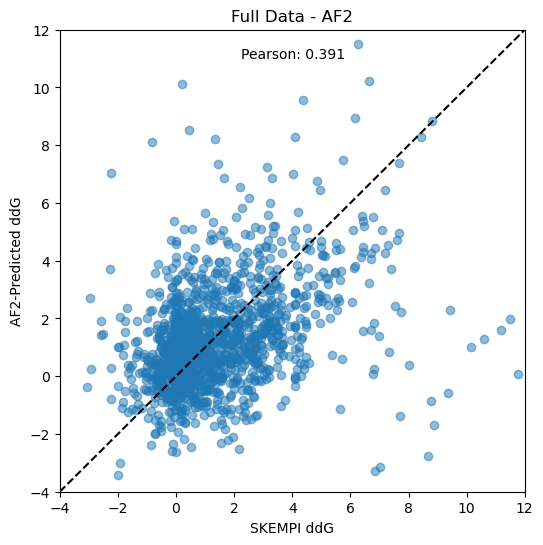

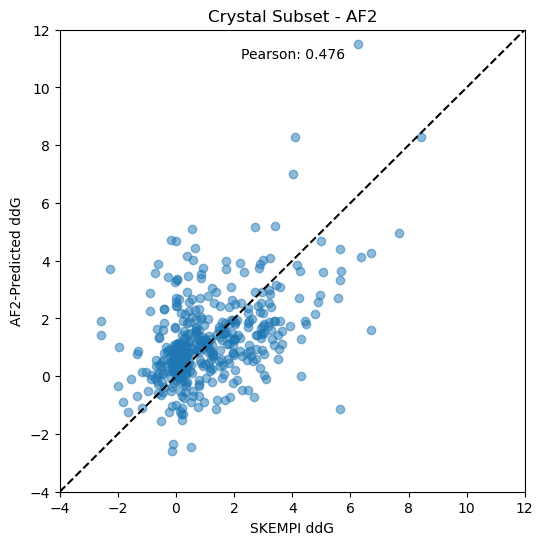

In [622]:
plotdata([fullxdata_af2, fullydata_af2, "Full Data - AF2"], "SKEMPI ddG", "AF2-Predicted ddG", "full_af2_scatter.pdf")
plotdata([partialx_af2, partialy_af2, "Crystal Subset - AF2"], "SKEMPI ddG", "AF2-Predicted ddG", "part_af2_scatter.pdf")

In [520]:
fullxdata = []
fullydata = []
partialx_af3 = []
partialy_af3 = []
i = 0
while (i < len(_1DAN_3[0])):
    fullxdata.append(_1DAN_3[0][i])
    fullydata.append(_1DAN_3[1][i])
    i += 1
i = 0
while (i < len(_1JTG_3[0])):
    fullxdata.append(_1JTG_3[0][i])
    fullydata.append(_1JTG_3[1][i])
    partialx_af3.append(_1JTG_3[0][i])
    partialy_af3.append(_1JTG_3[1][i])
    i += 1
i = 0
while (i < len(_1KTZ_3[0])):
    fullxdata.append(_1KTZ_3[0][i])
    fullydata.append(_1KTZ_3[1][i])
    partialx_af3.append(_1KTZ_3[0][i])
    partialy_af3.append(_1KTZ_3[1][i])
    i += 1
i = 0
while (i < len(_1OGA_3[0])):
    fullxdata.append(_1OGA_3[0][i])
    fullydata.append(_1OGA_3[1][i])
    i += 1
i = 0
while (i < len(_1VFB_3[0])):
    fullxdata.append(_1VFB_3[0][i])
    fullydata.append(_1VFB_3[1][i])
    partialx_af3.append(_1JTG_3[0][i])
    partialy_af3.append(_1JTG_3[1][i])
    i += 1
i = 0
while (i < len(_2J0T_3[0])):
    fullxdata.append(_2J0T_3[0][i])
    fullydata.append(_2J0T_3[1][i])
    partialx_af3.append(_2J0T_3[0][i])
    partialy_af3.append(_2J0T_3[1][i])
    i += 1
i = 0
while (i < len(_3BN9_3[0])):
    fullxdata.append(_3BN9_3[0][i])
    fullydata.append(_3BN9_3[1][i])
    partialx_af3.append(_3BN9_3[0][i])
    partialy_af3.append(_3BN9_3[1][i])
    i += 1
i = 0
while (i < len(_3MZG_3[0])):
    fullxdata.append(_3MZG_3[0][i])
    fullydata.append(_3MZG_3[1][i])
    partialx_af3.append(_3MZG_3[0][i])
    partialy_af3.append(_3MZG_3[1][i])
    i += 1
i = 0
while (i < len(_3SGB_3[0])):
    fullxdata.append(_3SGB_3[0][i])
    fullydata.append(_3SGB_3[1][i])
    partialx_af3.append(_3SGB_3[0][i])
    partialy_af3.append(_3SGB_3[1][i])
    i += 1
i = 0
while (i < len(_3SZK_3[0])):
    fullxdata.append(_3SZK_3[0][i])
    fullydata.append(_3SZK_3[1][i])
    partialx_af3.append(_3SZK_3[0][i])
    partialy_af3.append(_3SZK_3[1][i])
    i += 1
i = 0
while (i < len(_5E9D_3[0])):
    fullxdata.append(_5E9D_3[0][i])
    fullydata.append(_5E9D_3[1][i])
    partialx_af3.append(_5E9D_3[0][i])
    partialy_af3.append(_5E9D_3[1][i])
    i += 1
while (i < len(_1AO7_3[0])):
    fullxdata.append(_1AO7_3[0][i])
    fullydata.append(_1AO7_3[1][i])
    i += 1
i = 0
while (i < len(_1CHO_3[0])):
    fullxdata.append(_1CHO_3[0][i])
    fullydata.append(_1CHO_3[1][i])
    i += 1
i = 0
while (i < len(_1IAR_3[0])):
    fullxdata.append(_1IAR_3[0][i])
    fullydata.append(_1IAR_3[1][i])
    i += 1
i = 0
while (i < len(_1KNE_3[0])):
    fullxdata.append(_1KNE_3[0][i])
    fullydata.append(_1KNE_3[1][i])
    i += 1
i = 0
while (i < len(_1MHP_3[0])):
    fullxdata.append(_1MHP_3[0][i])
    fullydata.append(_1MHP_3[1][i])
    i += 1
i = 0
while (i < len(_1PPF_3[0])):
    fullxdata.append(_1PPF_3[0][i])
    fullydata.append(_1PPF_3[1][i])
    i += 1
i = 0
while (i < len(_1R0R_3[0])):
    fullxdata.append(_1R0R_3[0][i])
    fullydata.append(_1R0R_3[1][i])
    i += 1
i = 0
while (i < len(_2FTL_3[0])):
    fullxdata.append(_2FTL_3[0][i])
    fullydata.append(_2FTL_3[1][i])
    i += 1
i = 0
while (i < len(_2JEL_3[0])):
    fullxdata.append(_2JEL_3[0][i])
    fullydata.append(_2JEL_3[1][i])
    i += 1
i = 0
while (i < len(_3HFM_3[0])):
    fullxdata.append(_3HFM_3[0][i])
    fullydata.append(_3HFM_3[1][i])
    i += 1
fullxdata_af3 = fullxdata
fullydata_af3 = fullydata

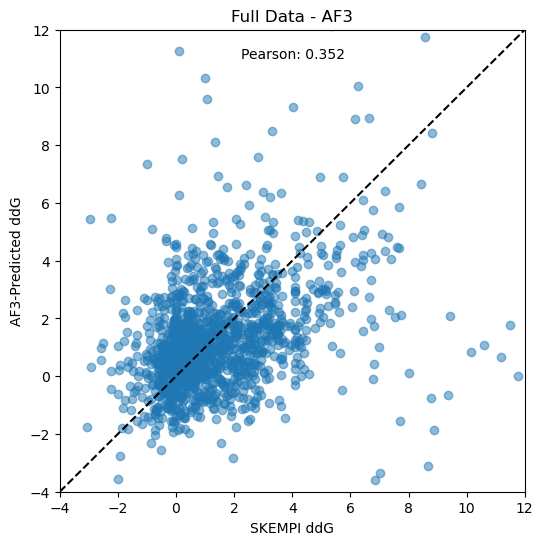

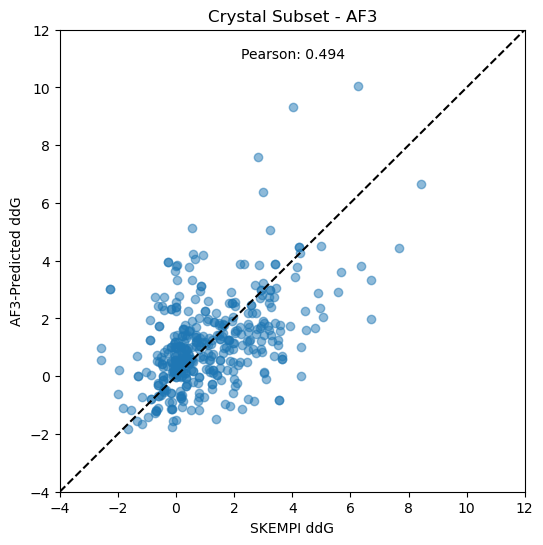

In [618]:
plotdata([fullxdata_af3, fullydata_af3, "Full Data - AF3"], "SKEMPI ddG", "AF3-Predicted ddG", "full_af3_scatter.pdf")
plotdata([partialx_af3, partialy_af3, "Crystal Subset - AF3"], "SKEMPI ddG", "AF3-Predicted ddG", "part_af3_scatter.pdf")

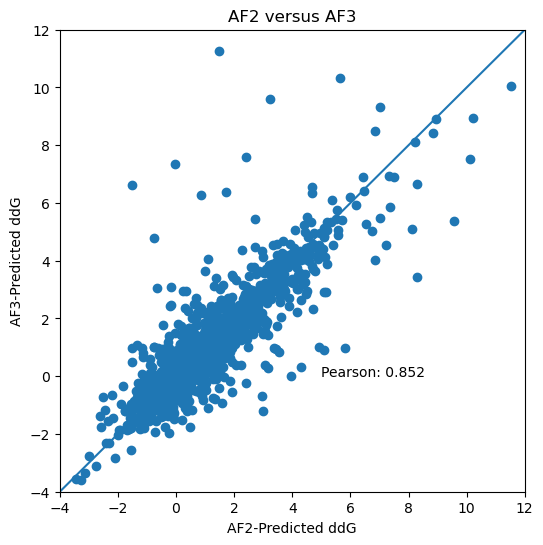

In [524]:
plotdata([fullydata_af2, fullydata_af3, "AF2 versus AF3"])

In [526]:
fullxdata = []
fullydata = []
i = 0
i = 0
while (i < len(_1JTG_x[0])):
    fullxdata.append(_1JTG_x[0][i])
    fullydata.append(_1JTG_x[1][i])
    i += 1
i = 0
while (i < len(_1KTZ_x[0])):
    fullxdata.append(_1KTZ_x[0][i])
    fullydata.append(_1KTZ_x[1][i])
    i += 1
i = 0
while (i < len(_1VFB_x[0])):
    fullxdata.append(_1VFB_x[0][i])
    fullydata.append(_1VFB_x[1][i])
    i += 1
i = 0
while (i < len(_2J0T_x[0])):
    fullxdata.append(_2J0T_x[0][i])
    fullydata.append(_2J0T_x[1][i])
    i += 1
i = 0
while (i < len(_3BN9_x[0])):
    fullxdata.append(_3BN9_x[0][i])
    fullydata.append(_3BN9_x[1][i])
    i += 1
i = 0
while (i < len(_3MZG_x[0])):
    fullxdata.append(_3MZG_x[0][i])
    fullydata.append(_3MZG_x[1][i])
    i += 1
i = 0
while (i < len(_3SGB_x[0])):
    fullxdata.append(_3SGB_x[0][i])
    fullydata.append(_3SGB_x[1][i])
    i += 1
i = 0
while (i < len(_3SZK_x[0])):
    fullxdata.append(_3SZK_x[0][i])
    fullydata.append(_3SZK_x[1][i])
    i += 1
i = 0
while (i < len(_5E9D_x[0])):
    fullxdata.append(_5E9D_x[0][i])
    fullydata.append(_5E9D_x[1][i])
    i += 1
fullxdata_xtal = fullxdata
fullydata_xtal = fullydata

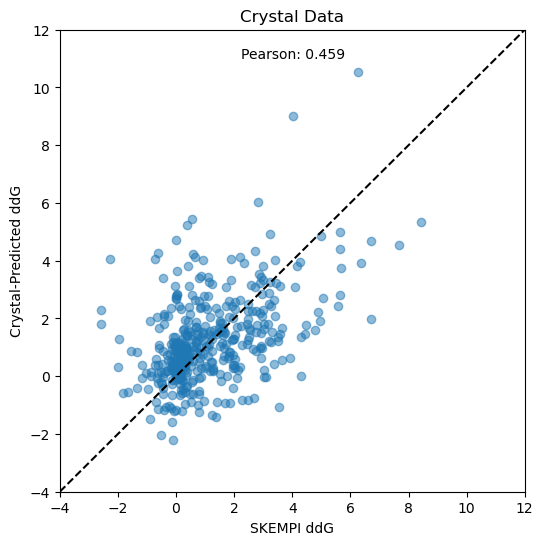

In [620]:
plotdata([fullxdata_xtal, fullydata_xtal, "Crystal Data"], "SKEMPI ddG", "Crystal-Predicted ddG", "xtal_scatter.pdf")

In [530]:
print(len(partialy_af3))
print(len(fullydata_xtal))
xvals = fullx
yvals = values[1]
title = values[2]
fig, ax = plt.subplots()
fig.set_size_inches(6.0, 6.0)
plt.scatter(xvals, yvals)
ax.set_xlim([-4, 12])
ax.set_ylim([-4, 12])
plt.xlabel("AF2-Predicted ddG")
plt.ylabel("AF3-Predicted ddG")
plt.title(title)
if numpy.ptp(xvals) == 0:  # ptp() gives the range (max-min)
    raise ValueError("xvals must have a nonzero range for polyfit()")
    #m,b = numpy.polyfit(xvals, yvals, 1)
    #plt.axline((0, b), slope=m)
    #regr = linear_model.LinearRegression()
    #X = numpy.array(xvals).reshape(-1, 1)
    #regr.fit(X, yvals)
    #ypreds = regr.predict(X)
j = 0
plt.axline((0, 0), slope=1)
while (j < len(xvals)):
    printout = str(xvals[j]) + ", "  + str(yvals[j])
    # print(printout)
    j += 1
xpos = 5
if (title == "5E9D"):
    xpos = 1
plt.text(xpos, 0, "Pearson: %.3f" % numpy.corrcoef(xvals, yvals)[1][0])
    
plt.show()

411
409


NameError: name 'fullx' is not defined

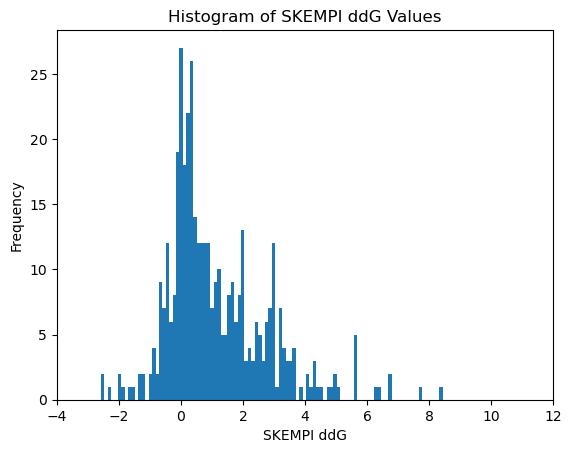

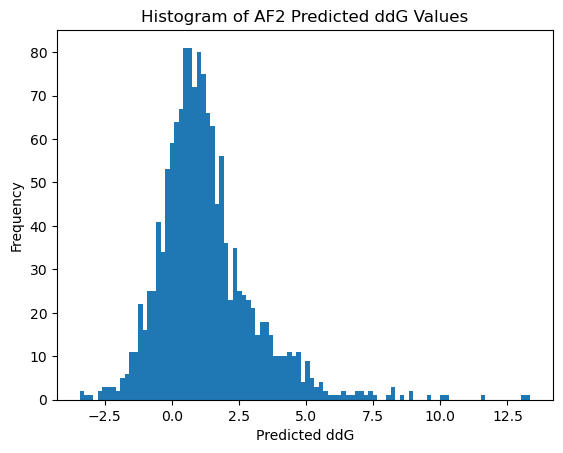

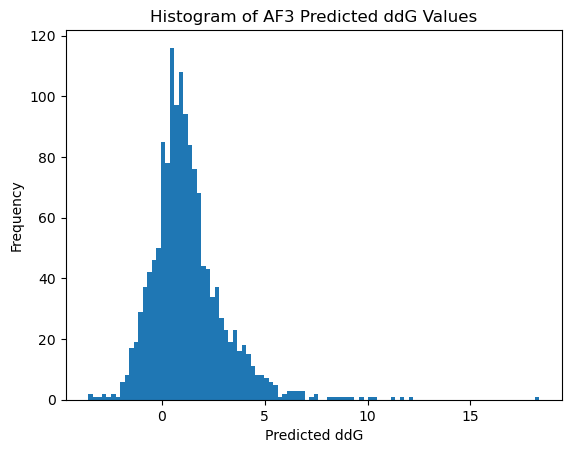

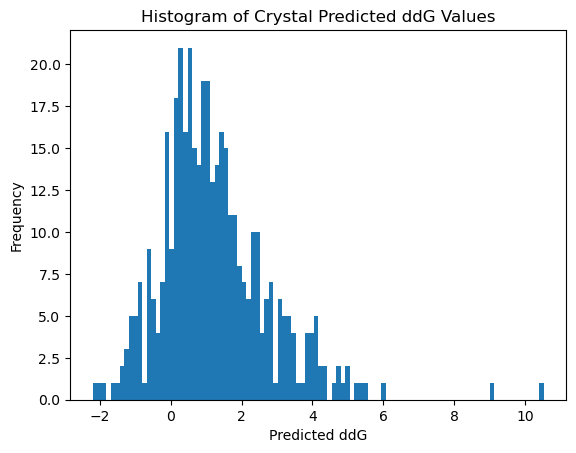

In [336]:
fig, ax = plt.subplots()
ax.set_xlim([-4, 12])
plt.hist(fullxdata, bins = 100)
plt.xlabel("SKEMPI ddG")
plt.ylabel("Frequency")
plt.title("Histogram of SKEMPI ddG Values")
plt.show()
plt.hist(fullydata_af2, bins = 100)
ax.set_xlim([-4, 12])
plt.xlabel("Predicted ddG")
plt.ylabel("Frequency")
plt.title("Histogram of AF2 Predicted ddG Values")
plt.show()
plt.hist(fullydata_af3, bins = 100)
ax.set_xlim([-4, 12])
plt.xlabel("Predicted ddG")
plt.ylabel("Frequency")
plt.title("Histogram of AF3 Predicted ddG Values")
plt.show()
plt.hist(fullydata_xtal, bins = 100)
ax.set_xlim([-4, 12])
plt.xlabel("Predicted ddG")
plt.ylabel("Frequency")
plt.title("Histogram of Crystal Predicted ddG Values")
plt.show()

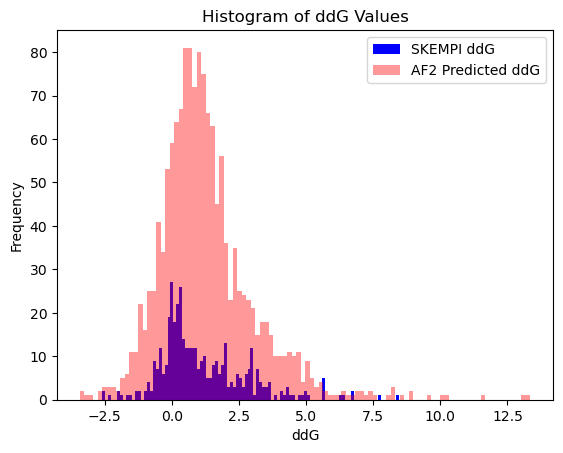

In [338]:
plt.hist(fullxdata, bins = 100, color = "blue", label = "SKEMPI ddG")
plt.hist(fullydata_af2, bins = 100, alpha = 0.4, color = "red", label = "AF2 Predicted ddG")
#plt.hist(fullydata_af3, bins = 100, alpha = 0.4, color = "green", label = "AF3 Predicted ddG")
#plt.hist(fullydata_xtal, bins = 100, alpha = 0.4, color = "black", label = "Crystal Predicted ddG")
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values")
plt.legend()
plt.show()

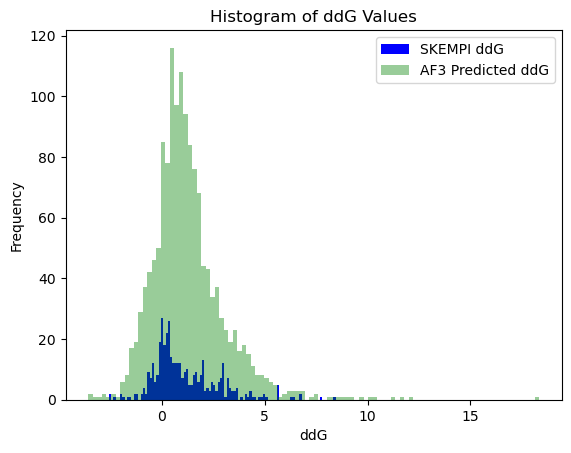

In [340]:
plt.hist(fullxdata, bins = 100, color = "blue", label = "SKEMPI ddG")
#plt.hist(fullydata_af2, bins = 100, alpha = 0.4, color = "red", label = "AF2 Predicted ddG")
plt.hist(fullydata_af3, bins = 100, alpha = 0.4, color = "green", label = "AF3 Predicted ddG")
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values")
plt.legend()
plt.show()

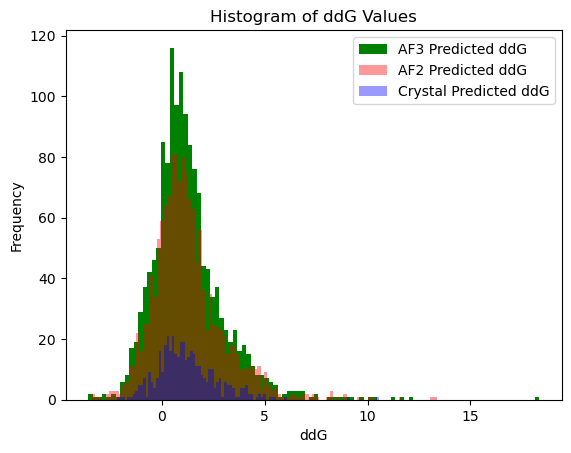

In [350]:
#plt.hist(fullxdata, bins = 100, color = "blue", label = "SKEMPI ddG")
plt.hist(fullydata_af3, bins = 100, alpha = 1, color = "green", label = "AF3 Predicted ddG")
plt.hist(fullydata_af2, bins = 100, alpha = 0.4, color = "red", label = "AF2 Predicted ddG")
plt.hist(fullydata_xtal, bins = 100, alpha = 0.4, color = "blue", label = "Crystal Predicted ddG")
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values")
plt.legend()
plt.show()

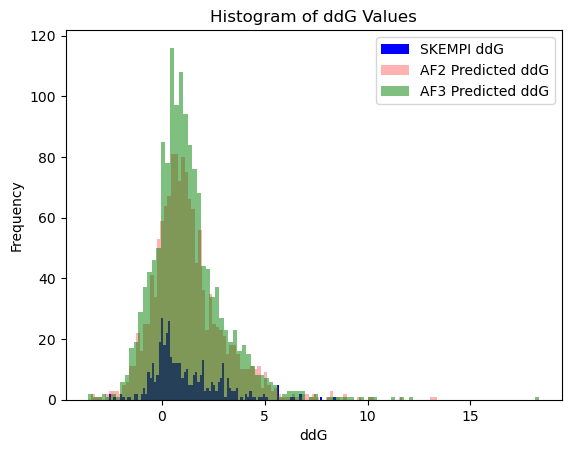

In [352]:
plt.hist(fullxdata, bins = 100, color = "blue", label = "SKEMPI ddG")
plt.hist(fullydata_af2, bins = 100, alpha = 0.3, color = "red", label = "AF2 Predicted ddG")
plt.hist(fullydata_af3, bins = 100, alpha = 0.5, color = "green", label = "AF3 Predicted ddG")
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values")
plt.legend()
plt.show()

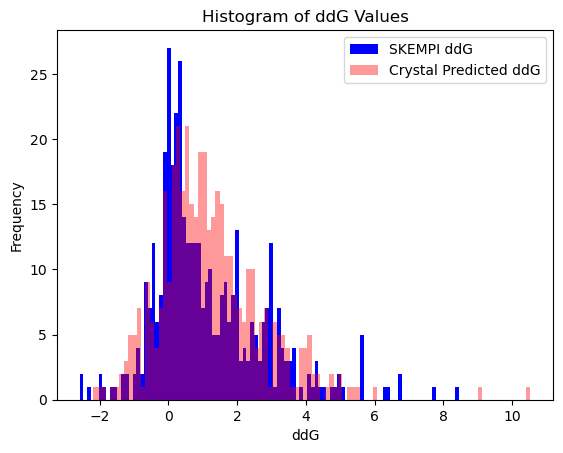

In [354]:
plt.hist(fullxdata, bins = 100, color = "blue", label = "SKEMPI ddG")
plt.hist(fullydata_xtal, bins = 100, alpha = 0.4, color = "red", label = "Crystal Predicted ddG")
plt.xlabel("ddG")
plt.ylabel("Frequency")
plt.title("Histogram of ddG Values")
plt.legend()
plt.show()

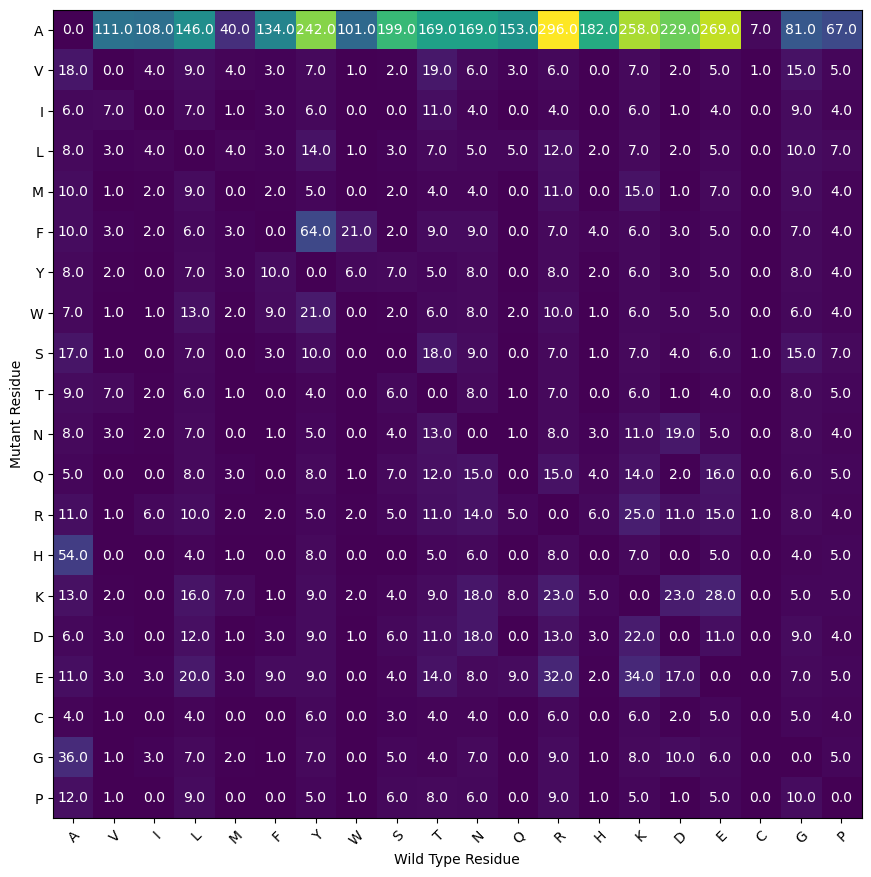

In [356]:
from_residue = 20 * [0]
to_residue = 20 * [0]
residue_array = numpy.zeros((20, 20))
aa_codes = {
    'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 
    'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 
    'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 
    'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19
}
aa_codes_2 = {
    'A': 0, 'V': 1, 'I': 2, 'L': 3, 'M': 4, 
    'F': 5, 'Y': 6, 'W': 7, 'S': 8, 'T': 9, 
    'N': 10, 'Q': 11, 'R': 12, 'H': 13, 'K': 14, 
    'D': 15, 'E': 16, 'C': 17, 'G': 18, 'P': 19
}
aa_order = ["A", "V", "I", "L", "M", "F", "Y", "W", "S", "T", "N", "Q",
           "R", "H", "K", "D", "E","C", "G", "P",]

for each in filtered_df["Mutation(s)_cleaned"]:
    i = 0
    for char in each:
        if (char in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
            i += 1
            if (i == 1):
                fro = aa_codes_2[char]
                from_residue[aa_codes_2[char]] += 1
            elif (i == 3):
                to = aa_codes_2[char]
                to_residue[aa_codes_2[char]] += 1
    residue_array[to][fro] += 1         
fig, ax = plt.subplots()
#plt.figure(figsize=(8, 6), dpi=80)
fig.set_size_inches(18.5, 10.5)
im = ax.imshow(residue_array)

plt.xlabel("Wild Type Residue")
plt.ylabel("Mutant Residue")
ax.set_xticks(range(len(aa_codes.keys())), labels=aa_codes_2.keys(),
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(aa_codes.keys())), labels=aa_codes_2.keys())
for i in range(len(aa_codes.keys())):
    for j in range(len(aa_codes.keys())):
        text = ax.text(j, i, residue_array[i, j],
                       ha="center", va="center", color="w")

In [358]:
numpy.sum(residue_array[0])

2961.0

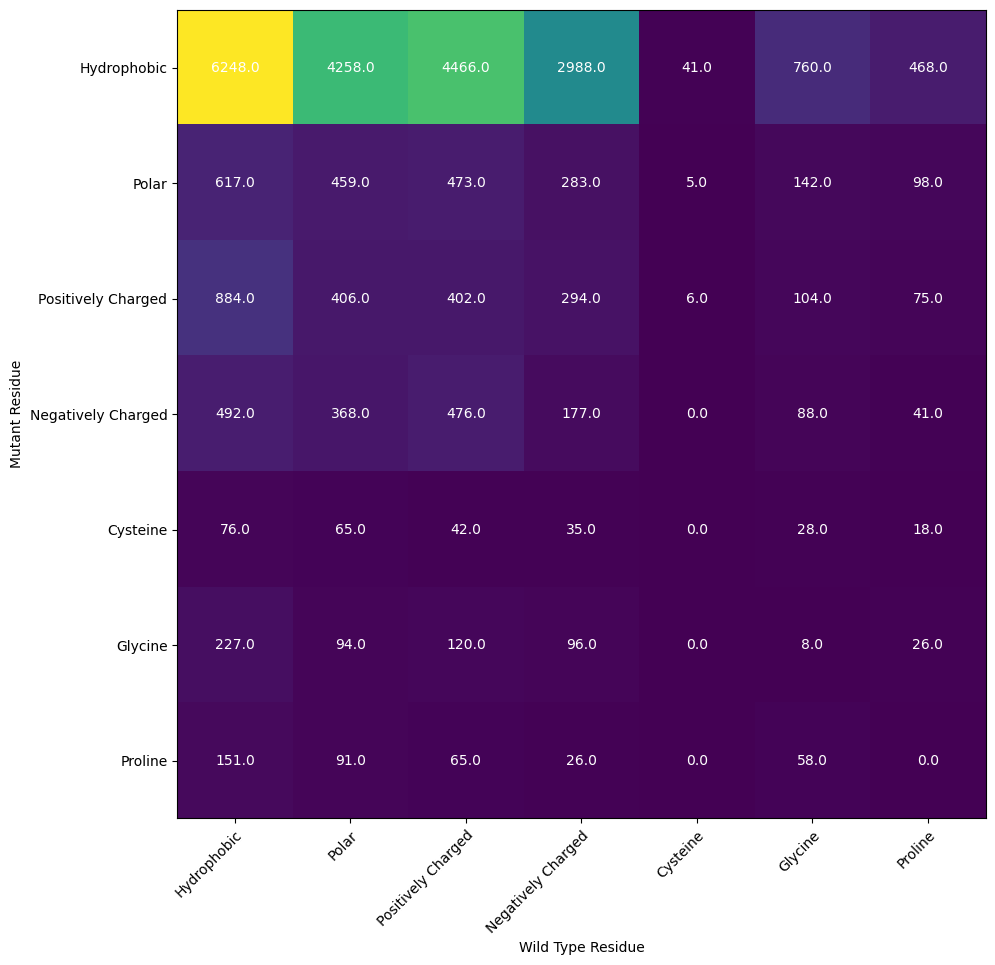

In [380]:
hp = "AVILMFYW"
polar = "STNQ"
pos = "RHK"
neg = "DE"
unique = "CGP"
mut_type_dict = {
    'A': 0, 'V': 0, 'I': 0, 'L': 0, 'M': 0, 
    'F': 0, 'Y': 0, 'W': 0, 'S': 1, 'T': 1, 
    'N': 1, 'Q': 1, 'R': 2, 'H': 2, 'K': 2, 
    'D': 3, 'E': 3, 'C': 4, 'G': 5, 'P': 6
}
mut_type = numpy.zeros((7, 7))
aa_types = ["Hydrophobic", "Polar", "Positively Charged", "Negatively Charged", "Cysteine", "Glycine", "Proline"]
to = 0
fro = 0
for each in filtered_df["Mutation(s)_cleaned"]:
    i = 0
    for char in each:
        if (char in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
            i += 1
            if (i == 1):
                fro = mut_type_dict[char]
            elif (i == 3):
                to = mut_type_dict[char]
                #print(to)
        #print(each)
        mut_type[to][fro] += 1
fig, ax = plt.subplots()
#plt.figure(figsize=(8, 6), dpi=80)
fig.set_size_inches(18.5, 10.5)
im = ax.imshow(mut_type)

plt.xlabel("Wild Type Residue")
plt.ylabel("Mutant Residue")
ax.set_xticks(range(len(aa_types)), labels=aa_types,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(aa_types)), labels=aa_types)
for i in range(len(aa_types)):
    for j in range(len(aa_types)):
        text = ax.text(j, i, mut_type[i, j],
                       ha="center", va="center", color="w")